This project was developed by Framba Matteo, Ph.D. in Mathematics, on December 31, 2024. All rights are reserved. The content, methodology, and analysis presented in this work are the intellectual property of the author, and reproduction or distribution is not permitted without explicit permission.

# PART I: FORECAST WITH CORRELATION

### Code Overview

This script is designed to analyze financial time series data, identify potential Granger causality relationships, and build predictive models for key target variables using machine learning. Below is a high-level summary of the script's functionality:

1. **Data Collection**:
   - Fetches daily closing prices for a range of financial assets (commodities, indices, currencies, and bonds) from January 2020 to December 2023 using the `yfinance` library.
   - Combines all series into a unified dataset for subsequent analysis.

2. **Exploratory Data Analysis**:
   - Visualizes trends for all financial series over time.
   - Computes and visualizes the correlation matrix to highlight linear dependencies among the variables.

3. **Granger Causality Testing**:
   - Implements Granger causality tests to identify whether one time series can predict another, based on a specified maximum lag.
   - Generates a heatmap of p-values across lags to summarize causality relationships.
   - Extracts and summarizes influential predictors for each target variable.

4. **Predictive Modeling**:
   - Uses Random Forest Regressor to predict daily returns for each target variable based on its identified influencers.
   - Evaluates model performance using Mean Squared Error (MSE) and classification accuracy for return sign prediction.
   - Visualizes predicted vs. actual returns, highlighting correct and incorrect trend predictions using green and red markers.

5. **Performance Summary**:
   - Compiles a performance summary of all models, ranking targets by MSE.
   - Provides bar charts to visualize MSE and accuracy for all target variables.


### 1 - Data Collection and Exploratory Analysis of Financial Time Series
This section focuses on retrieving and analyzing financial time series data. Using the `yfinance` library, daily closing prices for a range of financial assets, including commodities, indices, bonds, and currencies, are collected from January 2020 to December 2023. The collected data is processed into a unified DataFrame for analysis. Key steps include:

1. **Data Collection**:
   - Fetches closing prices for 10 financial assets (e.g., Crude Oil, Gold, S&P 500) and combines them into a single dataset.

2. **Visualization of Trends**:
   - Plots time series for all financial assets to observe trends and patterns over the selected time period.

3. **Correlation Analysis**:
   - Computes and visualizes the correlation matrix using a heatmap to identify linear relationships among the variables.

Fetching data for Crude Oil (CL=F)...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for Gold (GC=F)...
Fetching data for Silver (SI=F)...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for Copper (HG=F)...
Fetching data for Natural Gas (NG=F)...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for S&P 500 (^GSPC)...
Fetching data for DXY (USD Index) (DX-Y.NYB)...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for 10Y Treasury Yield (^TNX)...
Fetching data for EUR/USD (EURUSD=X)...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for Brent Crude (BZ=F)...

Combined Data (First 5 rows):
Price        Date  Crude Oil         Gold     Silver  Copper Natural Gas  \
Ticker                  CL=F         GC=F       SI=F    HG=F        NG=F   
0      2020-01-02  61.180000  1524.500000  17.966000  2.8330       2.122   
1      2020-01-03  63.049999  1549.199951  18.068001  2.7985       2.130   
2      2020-01-06  63.270000  1566.199951  18.097000  2.8005       2.135   
3      2020-01-07  62.700001  1571.800049  18.316000  2.8040       2.162   
4      2020-01-08  59.610001  1557.400024  18.087999  2.8190       2.141   

Price       S&P 500 DXY (USD Index) 10Y Treasury Yield   EUR/USD Brent Crude  
Ticker        ^GSPC        DX-Y.NYB               ^TNX  EURUSD=X        BZ=F  
0       3257.850098       96.849998              1.882  1.122083   66.250000  
1       3234.850098       96.839996              1.788  1.117144   68.599998  
2       3246.280029       96.669998              1.811  1.116196   68.910004  
3

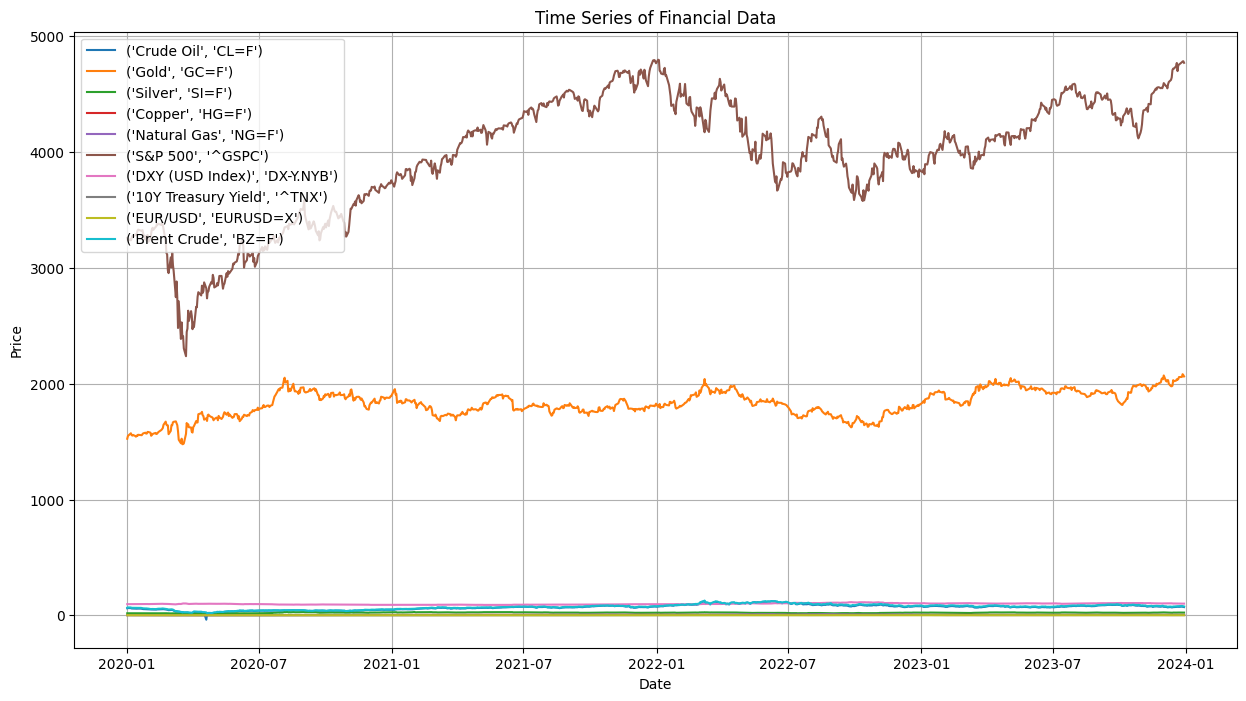


Correlation Matrix:
Price                       Crude Oil      Gold    Silver    Copper  \
Ticker                           CL=F      GC=F      SI=F      HG=F   
Price              Ticker                                             
Crude Oil          CL=F      1.000000  0.238449  0.207317  0.712221   
Gold               GC=F      0.238449  1.000000  0.666158  0.383292   
Silver             SI=F      0.207317  0.666158  1.000000  0.637681   
Copper             HG=F      0.712221  0.383292  0.637681  1.000000   
Natural Gas        NG=F      0.707261 -0.140087 -0.074950  0.399741   
S&P 500            ^GSPC     0.705055  0.473154  0.553972  0.861299   
DXY (USD Index)    DX-Y.NYB  0.473366 -0.025554 -0.495226 -0.115832   
10Y Treasury Yield ^TNX      0.654388  0.327344 -0.006736  0.291801   
EUR/USD            EURUSD=X -0.466439  0.134019  0.586495  0.143111   
Brent Crude        BZ=F      0.993307  0.220709  0.169633  0.691971   

Price                       Natural Gas   S&P 500 DXY (

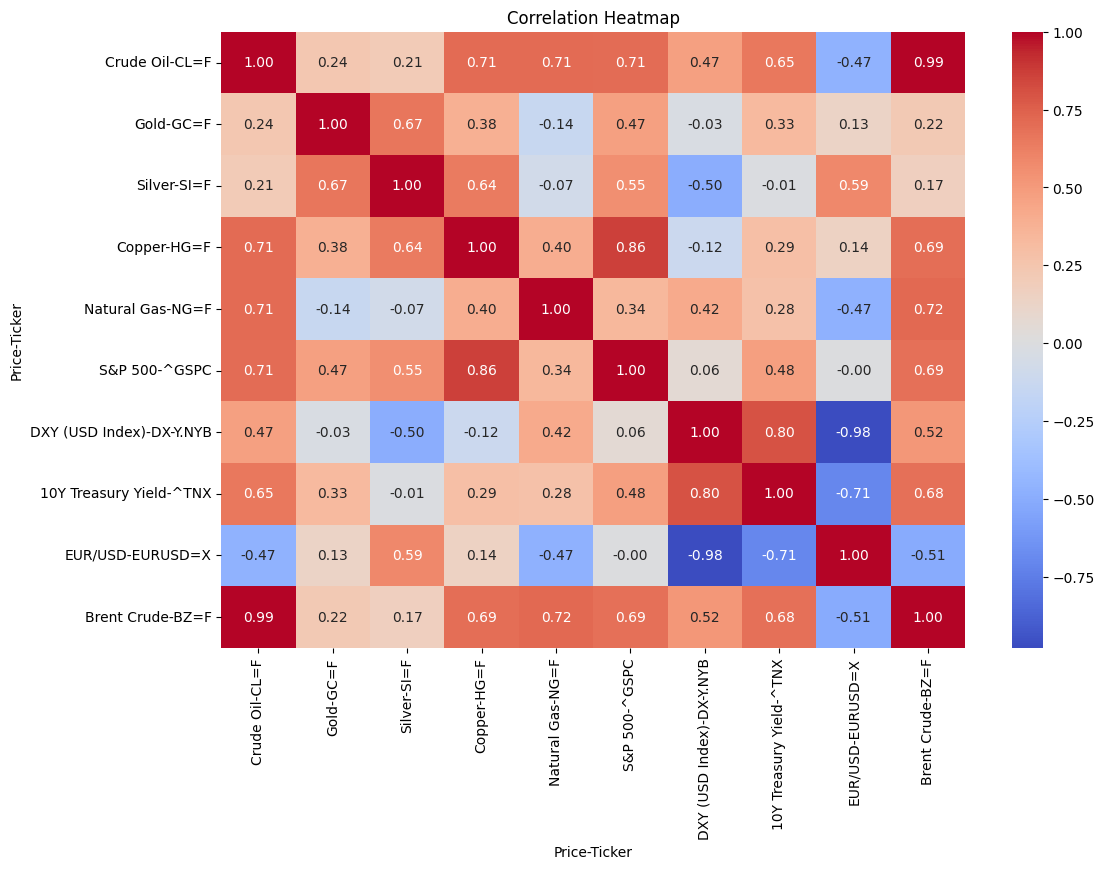

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import yfinance as yf  # Import yfinance for fetching financial data
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
import seaborn as sns

# Define the symbols for additional series (commodities, indices, bonds, etc.)
symbols = {
    "Crude Oil": "CL=F",  # Crude oil futures
    "Gold": "GC=F",  # Gold futures
    "Silver": "SI=F",  # Silver futures
    "Copper": "HG=F",  # Copper futures
    "Natural Gas": "NG=F",  # Natural gas futures
    "S&P 500": "^GSPC",  # S&P 500 index
    "DXY (USD Index)": "DX-Y.NYB",  # US Dollar Index
    "10Y Treasury Yield": "^TNX",  # 10-year treasury yield
    "EUR/USD": "EURUSD=X",  # EUR/USD exchange rate
    "Brent Crude": "BZ=F"  # Brent crude futures
}

# Fetch data for all symbols
dataframes = {}
for name, symbol in symbols.items():
    print(f"Fetching data for {name} ({symbol})...")
    df = yf.download(symbol, start="2020-01-01", end="2023-12-31")
    df = df[["Close"]].rename(columns={"Close": name})  # Keep only the Close price and rename the column
    dataframes[name] = df

# Combine all series into a single DataFrame
combined_data = pd.concat(dataframes.values(), axis=1, join="inner")
combined_data.reset_index(inplace=True)  # Reset index to include Date
print("\nCombined Data (First 5 rows):")
print(combined_data.head())

# Plot all series to visualize trends
plt.figure(figsize=(15, 8))
for column in combined_data.columns[1:]:
    plt.plot(combined_data["Date"], combined_data[column], label=column)
plt.title("Time Series of Financial Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# Correlation Analysis
print("\nCorrelation Matrix:")
correlation_matrix = combined_data.iloc[:, 1:].corr()
print(correlation_matrix)

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



The heatmap provides a clear visualization of the correlation matrix for various financial assets over the specified period. Below are key observations:

1. **High Correlation Clusters**:
   - **Crude Oil (CL=F)** and **Brent Crude (BZ=F)** show almost perfect correlation (0.99), reflecting their strong linkage as global oil benchmarks.
   - **Gold (GC=F)** and **Silver (SI=F)** display a notable correlation (0.67), which is expected as they are both precious metals.

2. **Low or Negative Correlations**:
   - The **DXY (USD Index)** shows negative correlations with several assets, especially **EUR/USD (-0.98)**, which makes sense due to their inverse relationship in forex markets.

3. **Interesting Relationships**:
   - **Natural Gas (NG=F)** exhibits relatively weak correlations with most assets, suggesting it operates under different market dynamics compared to oil or metals.
   - **S&P 500 (GSPC)** has moderate to strong positive correlations with **Copper (HG=F)** (0.86), highlighting copper's role as a barometer for economic growth.

4. **General Insights**:
   - The correlation values reveal clusters of assets that move similarly, useful for portfolio diversification or hedging strategies.
   - Negative correlations, such as between **DXY** and **EUR/USD**, can provide hedging opportunities or insights into market drivers.



### 2 - Data Preprocessing and Column Normalization

This section focuses on preparing the financial dataset for analysis by ensuring consistency and usability. The steps involved include:

1. **Combining Data**:
   - Merges all individual financial time series into a unified DataFrame, retaining only overlapping dates across all series.

2. **Column Renaming**:
   - Renames columns to ensure they are flat and standardized, removing any inconsistencies or nested structures in column names.

3. **Index Reset**:
   - Resets the index to include the `Date` column explicitly, making the dataset suitable for time series operations and visualization.

In [2]:
# Combine all series into a single DataFrame
combined_data = pd.concat(dataframes.values(), axis=1, join="inner")

# Rename columns to ensure they are flat and consistent
combined_data.columns = [col.split(" ")[0] if isinstance(col, str) else col for col in combined_data.columns]

# Reset index to include Date
combined_data.reset_index(inplace=True)

print("Updated Column Names in combined_data:")
print(combined_data.columns)

# Flatten column names in combined_data
combined_data.columns = [
    col[0] if isinstance(col, tuple) and col[1] == '' else f"{col[0]}_{col[1]}"
    for col in combined_data.columns
]

print("Flattened Columns in combined_data:")
print(combined_data.columns)


Updated Column Names in combined_data:
Index([                         'Date',           ('Crude Oil', 'CL=F'),
                      ('Gold', 'GC=F'),              ('Silver', 'SI=F'),
                    ('Copper', 'HG=F'),         ('Natural Gas', 'NG=F'),
                  ('S&P 500', '^GSPC'), ('DXY (USD Index)', 'DX-Y.NYB'),
        ('10Y Treasury Yield', '^TNX'),         ('EUR/USD', 'EURUSD=X'),
               ('Brent Crude', 'BZ=F')],
      dtype='object')
Flattened Columns in combined_data:
Index(['D_a', 'Crude Oil_CL=F', 'Gold_GC=F', 'Silver_SI=F', 'Copper_HG=F',
       'Natural Gas_NG=F', 'S&P 500_^GSPC', 'DXY (USD Index)_DX-Y.NYB',
       '10Y Treasury Yield_^TNX', 'EUR/USD_EURUSD=X', 'Brent Crude_BZ=F'],
      dtype='object')


### 3a - Granger Causality Testing for Crude Oil

This function is designed to test Granger causality relationships between financial time series, focusing specifically on identifying predictors for **Crude Oil**. Key steps and features of the function include:

1. **Target Identification**:
   - Selects "Crude Oil" as the target variable for which potential causal relationships are tested.

2. **Exclusion of Non-Numeric Data**:
   - Automatically excludes non-numeric columns, ensuring the analysis focuses on valid financial time series.

3. **Granger Causality Test**:
   - Iteratively performs Granger causality tests for each numeric column against the target variable (Crude Oil).
   - Computes and stores p-values for each lag, allowing the identification of significant predictors.

4. **Error Handling**:
   - Captures and logs cases where insufficient data prevents a Granger causality test from being conducted.

5. **Result Format**:
   - Returns the p-values for all tested series and lags as a DataFrame, enabling easy interpretation of causal relationships.


In [3]:
def test_granger_causality(data, max_lag=5):
    # Ensure we exclude the Date column or any non-numeric columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

    # Identify the target column for crude oil
    target_col = [col for col in numeric_columns if "Crude Oil" in col][0]

    results = {}
    for col in numeric_columns:
        if col != target_col:
            print(f"\nTesting Granger causality: {col} -> {target_col}")
            try:
                result = grangercausalitytests(data[[target_col, col]].dropna(), max_lag, verbose=False)
                p_values = [round(result[i+1][0]['ssr_chi2test'][1], 4) for i in range(max_lag)]
                results[col] = p_values
            except ValueError as e:
                print(f"Insufficient data for {col}: {e}")
    return pd.DataFrame(results, index=[f"Lag {i+1}" for i in range(max_lag)])



Granger Causality Test Results:

Testing Granger causality: Gold_GC=F -> Crude Oil_CL=F

Testing Granger causality: Silver_SI=F -> Crude Oil_CL=F

Testing Granger causality: Copper_HG=F -> Crude Oil_CL=F

Testing Granger causality: Natural Gas_NG=F -> Crude Oil_CL=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: S&P 500_^GSPC -> Crude Oil_CL=F

Testing Granger causality: DXY (USD Index)_DX-Y.NYB -> Crude Oil_CL=F

Testing Granger causality: 10Y Treasury Yield_^TNX -> Crude Oil_CL=F

Testing Granger causality: EUR/USD_EURUSD=X -> Crude Oil_CL=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Brent Crude_BZ=F -> Crude Oil_CL=F
       Gold_GC=F  Silver_SI=F  Copper_HG=F  Natural Gas_NG=F  S&P 500_^GSPC  \
Lag 1     0.3107       0.1823       0.0012            0.0596         0.0016   
Lag 2     0.1472       0.0795       0.0013            0.0762         0.0074   
Lag 3     0.0640       0.0774       0.0003            0.0246         0.0013   
Lag 4     0.1385       0.1044       0.0002            0.0280         0.0014   
Lag 5     0.1207       0.1220       0.0002            0.0366         0.0026   

       DXY (USD Index)_DX-Y.NYB  10Y Treasury Yield_^TNX  EUR/USD_EURUSD=X  \
Lag 1                    0.9120                   0.3737            0.9399   
Lag 2                    0.6514                   0.8496            0.7789   
Lag 3                    0.8095                   0.6159            0.8219   
Lag 4                    0.8357                   0.7073            0.7445   
Lag 5                    0.6861                   0.6846            0.82

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


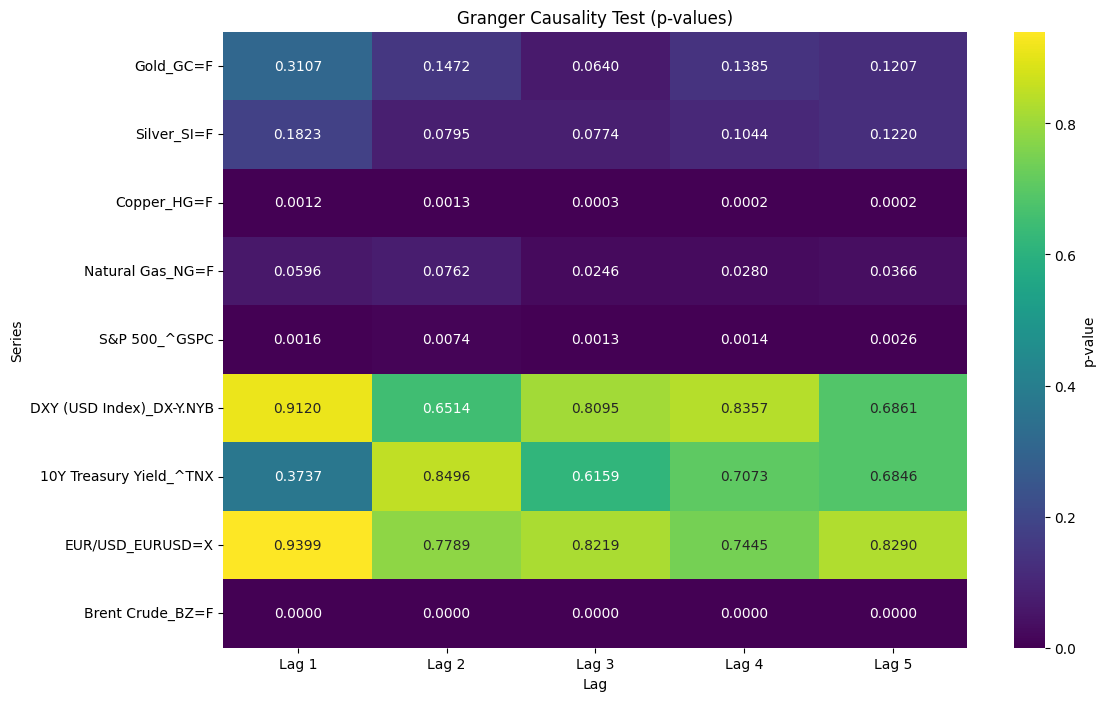

In [4]:
print("\nGranger Causality Test Results:")
granger_results = test_granger_causality(combined_data, max_lag=5)
print(granger_results)

# Visualize the results
plt.figure(figsize=(12, 8))
sns.heatmap(granger_results.T, annot=True, cmap="viridis", cbar_kws={'label': 'p-value'}, fmt=".4f")
plt.title("Granger Causality Test (p-values)")
plt.xlabel("Lag")
plt.ylabel("Series")
plt.show()


In [5]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd
import numpy as np

def test_granger_causality_all(data, max_lag=5):
    # Ensure we exclude non-numeric columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

    results = {}

    # Iterate over all pairs of columns
    for target_col in numeric_columns:
        results[target_col] = {}
        for col in numeric_columns:
            if col != target_col:
                print(f"\nTesting Granger causality: {col} -> {target_col}")
                try:
                    # Granger causality test
                    result = grangercausalitytests(data[[target_col, col]].dropna(), max_lag, verbose=False)
                    # Collect p-values for each lag
                    p_values = [round(result[i+1][0]['ssr_chi2test'][1], 4) for i in range(max_lag)]
                    results[target_col][col] = p_values
                except ValueError as e:
                    print(f"Insufficient data for {col} -> {target_col}: {e}")
                    results[target_col][col] = [None] * max_lag

    # Create a DataFrame for a tabular representation of the results
    result_df = pd.DataFrame({target: {source: min(p_values or [1]) for source, p_values in sources.items()}
                              for target, sources in results.items()})

    # Identify which stocks are influenced the most
    influences = result_df.apply(lambda row: row[row < 0.05].index.tolist(), axis=1)
    influence_summary = pd.DataFrame({
        "Influenced By": influences,
        "Count": influences.apply(len)
    })

    return result_df, influence_summary


### 3b - Comprehensive Granger Causality Testing

This section generalizes the Granger causality analysis to evaluate causal relationships between all pairs of financial time series. The key elements include:

1. **Pairwise Granger Causality Testing**:
   - Iteratively performs Granger causality tests between each pair of series for all lags up to a specified maximum.
   - Collects p-values to determine the significance of potential causal relationships.

2. **P-Value Matrix**:
   - Summarizes the minimum p-values across all lags for each pair of source and target series in a DataFrame.
   - Provides a clear representation of the causal relationships among financial series.

3. **Influence Summary**:
   - Identifies which series are significantly influenced by others (p < 0.05) and counts the number of significant influences for each target.

4. **Visualization**:
   - Displays a heatmap of the minimum p-values for each pair of series to highlight the strength of causal relationships.
   - Plots a bar chart showing the number of significant influences for each target series.


Granger Causality Test Results (P-Value Matrix):

Testing Granger causality: Gold_GC=F -> Crude Oil_CL=F

Testing Granger causality: Silver_SI=F -> Crude Oil_CL=F

Testing Granger causality: Copper_HG=F -> Crude Oil_CL=F

Testing Granger causality: Natural Gas_NG=F -> Crude Oil_CL=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: S&P 500_^GSPC -> Crude Oil_CL=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: DXY (USD Index)_DX-Y.NYB -> Crude Oil_CL=F

Testing Granger causality: 10Y Treasury Yield_^TNX -> Crude Oil_CL=F

Testing Granger causality: EUR/USD_EURUSD=X -> Crude Oil_CL=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Brent Crude_BZ=F -> Crude Oil_CL=F

Testing Granger causality: Crude Oil_CL=F -> Gold_GC=F

Testing Granger causality: Silver_SI=F -> Gold_GC=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Copper_HG=F -> Gold_GC=F

Testing Granger causality: Natural Gas_NG=F -> Gold_GC=F

Testing Granger causality: S&P 500_^GSPC -> Gold_GC=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: DXY (USD Index)_DX-Y.NYB -> Gold_GC=F

Testing Granger causality: 10Y Treasury Yield_^TNX -> Gold_GC=F

Testing Granger causality: EUR/USD_EURUSD=X -> Gold_GC=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Brent Crude_BZ=F -> Gold_GC=F

Testing Granger causality: Crude Oil_CL=F -> Silver_SI=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Gold_GC=F -> Silver_SI=F

Testing Granger causality: Copper_HG=F -> Silver_SI=F

Testing Granger causality: Natural Gas_NG=F -> Silver_SI=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: S&P 500_^GSPC -> Silver_SI=F

Testing Granger causality: DXY (USD Index)_DX-Y.NYB -> Silver_SI=F

Testing Granger causality: 10Y Treasury Yield_^TNX -> Silver_SI=F

Testing Granger causality: EUR/USD_EURUSD=X -> Silver_SI=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Brent Crude_BZ=F -> Silver_SI=F

Testing Granger causality: Crude Oil_CL=F -> Copper_HG=F

Testing Granger causality: Gold_GC=F -> Copper_HG=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Silver_SI=F -> Copper_HG=F

Testing Granger causality: Natural Gas_NG=F -> Copper_HG=F

Testing Granger causality: S&P 500_^GSPC -> Copper_HG=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: DXY (USD Index)_DX-Y.NYB -> Copper_HG=F

Testing Granger causality: 10Y Treasury Yield_^TNX -> Copper_HG=F

Testing Granger causality: EUR/USD_EURUSD=X -> Copper_HG=F

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(




Testing Granger causality: Brent Crude_BZ=F -> Copper_HG=F

Testing Granger causality: Crude Oil_CL=F -> Natural Gas_NG=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Gold_GC=F -> Natural Gas_NG=F

Testing Granger causality: Silver_SI=F -> Natural Gas_NG=F

Testing Granger causality: Copper_HG=F -> Natural Gas_NG=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: S&P 500_^GSPC -> Natural Gas_NG=F

Testing Granger causality: DXY (USD Index)_DX-Y.NYB -> Natural Gas_NG=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: 10Y Treasury Yield_^TNX -> Natural Gas_NG=F

Testing Granger causality: EUR/USD_EURUSD=X -> Natural Gas_NG=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Brent Crude_BZ=F -> Natural Gas_NG=F

Testing Granger causality: Crude Oil_CL=F -> S&P 500_^GSPC


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Gold_GC=F -> S&P 500_^GSPC

Testing Granger causality: Silver_SI=F -> S&P 500_^GSPC

Testing Granger causality: Copper_HG=F -> S&P 500_^GSPC


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Natural Gas_NG=F -> S&P 500_^GSPC

Testing Granger causality: DXY (USD Index)_DX-Y.NYB -> S&P 500_^GSPC


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: 10Y Treasury Yield_^TNX -> S&P 500_^GSPC

Testing Granger causality: EUR/USD_EURUSD=X -> S&P 500_^GSPC


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Brent Crude_BZ=F -> S&P 500_^GSPC

Testing Granger causality: Crude Oil_CL=F -> DXY (USD Index)_DX-Y.NYB

Testing Granger causality: Gold_GC=F -> DXY (USD Index)_DX-Y.NYB

Testing Granger causality: Silver_SI=F -> DXY (USD Index)_DX-Y.NYB

Testing Granger causality: Copper_HG=F -> DXY (USD Index)_DX-Y.NYB


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Natural Gas_NG=F -> DXY (USD Index)_DX-Y.NYB

Testing Granger causality: S&P 500_^GSPC -> DXY (USD Index)_DX-Y.NYB

Testing Granger causality: 10Y Treasury Yield_^TNX -> DXY (USD Index)_DX-Y.NYB


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: EUR/USD_EURUSD=X -> DXY (USD Index)_DX-Y.NYB

Testing Granger causality: Brent Crude_BZ=F -> DXY (USD Index)_DX-Y.NYB

Testing Granger causality: Crude Oil_CL=F -> 10Y Treasury Yield_^TNX


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Gold_GC=F -> 10Y Treasury Yield_^TNX

Testing Granger causality: Silver_SI=F -> 10Y Treasury Yield_^TNX

Testing Granger causality: Copper_HG=F -> 10Y Treasury Yield_^TNX

Testing Granger causality: Natural Gas_NG=F -> 10Y Treasury Yield_^TNX


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: S&P 500_^GSPC -> 10Y Treasury Yield_^TNX

Testing Granger causality: DXY (USD Index)_DX-Y.NYB -> 10Y Treasury Yield_^TNX

Testing Granger causality: EUR/USD_EURUSD=X -> 10Y Treasury Yield_^TNX


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Brent Crude_BZ=F -> 10Y Treasury Yield_^TNX

Testing Granger causality: Crude Oil_CL=F -> EUR/USD_EURUSD=X


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Gold_GC=F -> EUR/USD_EURUSD=X

Testing Granger causality: Silver_SI=F -> EUR/USD_EURUSD=X


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Copper_HG=F -> EUR/USD_EURUSD=X

Testing Granger causality: Natural Gas_NG=F -> EUR/USD_EURUSD=X

Testing Granger causality: S&P 500_^GSPC -> EUR/USD_EURUSD=X


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: DXY (USD Index)_DX-Y.NYB -> EUR/USD_EURUSD=X

Testing Granger causality: 10Y Treasury Yield_^TNX -> EUR/USD_EURUSD=X

Testing Granger causality: Brent Crude_BZ=F -> EUR/USD_EURUSD=X


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Crude Oil_CL=F -> Brent Crude_BZ=F

Testing Granger causality: Gold_GC=F -> Brent Crude_BZ=F

Testing Granger causality: Silver_SI=F -> Brent Crude_BZ=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: Copper_HG=F -> Brent Crude_BZ=F

Testing Granger causality: Natural Gas_NG=F -> Brent Crude_BZ=F

Testing Granger causality: S&P 500_^GSPC -> Brent Crude_BZ=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Testing Granger causality: DXY (USD Index)_DX-Y.NYB -> Brent Crude_BZ=F

Testing Granger causality: 10Y Treasury Yield_^TNX -> Brent Crude_BZ=F

Testing Granger causality: EUR/USD_EURUSD=X -> Brent Crude_BZ=F


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


                          Crude Oil_CL=F  Gold_GC=F  Silver_SI=F  Copper_HG=F  \
Gold_GC=F                         0.0640        NaN       0.0152       0.3080   
Silver_SI=F                       0.0774     0.0164          NaN       0.0671   
Copper_HG=F                       0.0002     0.3782       0.7134          NaN   
Natural Gas_NG=F                  0.0246     0.1168       0.2748       0.5194   
S&P 500_^GSPC                     0.0013     0.0854       0.0311       0.0002   
DXY (USD Index)_DX-Y.NYB          0.6514     0.0299       0.0146       0.1301   
10Y Treasury Yield_^TNX           0.3737     0.0073       0.4097       0.0227   
EUR/USD_EURUSD=X                  0.7445     0.2564       0.1637       0.1160   
Brent Crude_BZ=F                  0.0000     0.0823       0.0597       0.1412   
Crude Oil_CL=F                       NaN     0.0125       0.0293       0.1883   

                          Natural Gas_NG=F  S&P 500_^GSPC  \
Gold_GC=F                           0.4086     

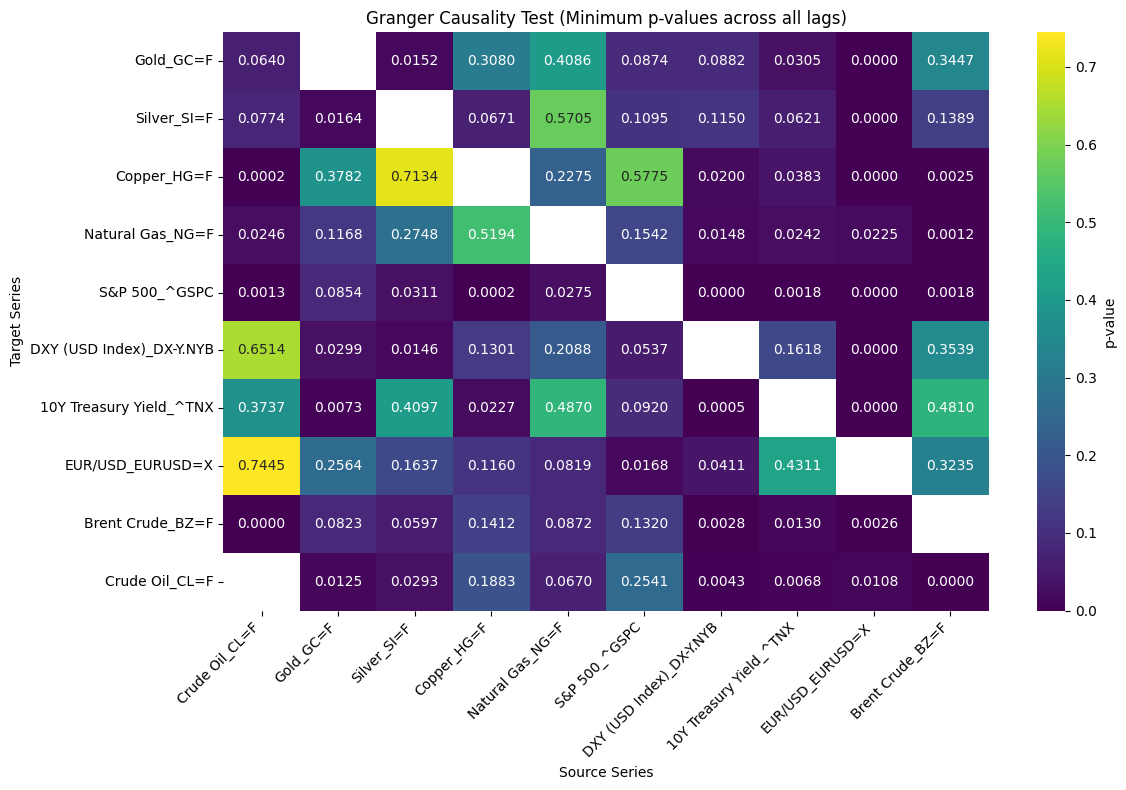


Influence Summary:
                                                              Influenced By  \
Gold_GC=F                 [Silver_SI=F, 10Y Treasury Yield_^TNX, EUR/USD...   
Silver_SI=F                                   [Gold_GC=F, EUR/USD_EURUSD=X]   
Copper_HG=F               [Crude Oil_CL=F, DXY (USD Index)_DX-Y.NYB, 10Y...   
Natural Gas_NG=F          [Crude Oil_CL=F, DXY (USD Index)_DX-Y.NYB, 10Y...   
S&P 500_^GSPC             [Crude Oil_CL=F, Silver_SI=F, Copper_HG=F, Nat...   
DXY (USD Index)_DX-Y.NYB         [Gold_GC=F, Silver_SI=F, EUR/USD_EURUSD=X]   
10Y Treasury Yield_^TNX   [Gold_GC=F, Copper_HG=F, DXY (USD Index)_DX-Y....   
EUR/USD_EURUSD=X                  [S&P 500_^GSPC, DXY (USD Index)_DX-Y.NYB]   
Brent Crude_BZ=F          [Crude Oil_CL=F, DXY (USD Index)_DX-Y.NYB, 10Y...   
Crude Oil_CL=F            [Gold_GC=F, Silver_SI=F, DXY (USD Index)_DX-Y....   

                          Count  
Gold_GC=F                     3  
Silver_SI=F                   2  
Copper_H

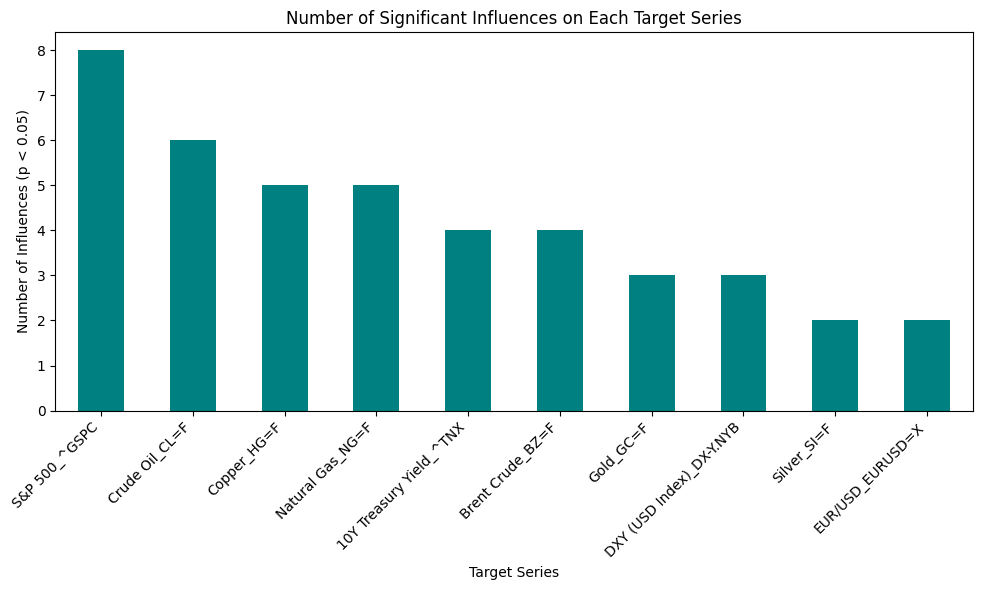

In [6]:
print("\nGranger Causality Test Results (P-Value Matrix):")
granger_results, influence_summary = test_granger_causality_all(combined_data, max_lag=5)
print(granger_results)

# Visualizzazione della matrice dei p-value
plt.figure(figsize=(12, 8))
sns.heatmap(granger_results, annot=True, cmap="viridis", cbar_kws={'label': 'p-value'}, fmt=".4f")
plt.title("Granger Causality Test (Minimum p-values across all lags)")
plt.xlabel("Source Series")
plt.ylabel("Target Series")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Riassunto delle influenze
print("\nInfluence Summary:")
print(influence_summary)

# Visualizzazione del conteggio delle influenze
plt.figure(figsize=(10, 6))
influence_summary['Count'].sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Number of Significant Influences on Each Target Series")
plt.ylabel("Number of Influences (p < 0.05)")
plt.xlabel("Target Series")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


A summary of the number of significant influences (p < 0.05) for each target series based on the Granger causality analysis is provided. Key observations include:

1. **Highly Influenced Series**:
   - **S&P 500 (GSPC)** exhibits the highest number of significant influences (8), indicating it is strongly affected by other financial variables in the dataset.

2. **Moderately Influenced Series**:
   - **Crude Oil (CL=F)** (6), **Copper (HG=F)** (5), and **Natural Gas (NG=F)** (5) show a moderate level of influence from other series, reflecting their interconnectedness with global market trends.

3. **Less Influenced Series**:
   - **Silver (SI=F)** (2) and **EUR/USD (EURUSD=X)** (2) demonstrate fewer significant influences, suggesting more isolated or independent market dynamics.

4. **General Insights**:
   - This distribution highlights the varying levels of interdependence among financial series, which can inform modeling strategies. For example, highly influenced series like the **S&P 500** may benefit from multi-variable modeling approaches, while less influenced series may require simpler models.


### 4 - Predictive Modeling with Random Forests

This section builds and evaluates predictive models for financial series, using the identified influencers from the Granger causality analysis. The approach focuses on forecasting daily returns and assessing the model's accuracy. Key steps include:

1. **Data Preparation**:
   - Extracts the target series and its influencers identified from the influence summary.
   - Computes daily returns for the target and predictor series.
   - Aligns predictor and target data to ensure temporal consistency.

2. **Binary Target Creation**:
   - Transforms target returns into a binary variable to indicate positive or negative daily returns for classification.

3. **Model Training and Prediction**:
   - Splits the data into training and testing sets (80%-20% split).
   - Trains a **Random Forest Regressor** on the training data to predict target returns.
   - Predicts daily returns and their signs on the test data.

4. **Performance Metrics**:
   - **Mean Squared Error (MSE)**: Measures the accuracy of predicted returns compared to actual values.
   - **Accuracy**: Evaluates the model's ability to classify the correct return sign.

5. **Results Visualization**:
   - Plots actual vs. predicted returns for each target series to assess model performance visually.
   - Summarizes performance across all target series in a bar chart for MSE and accuracy.


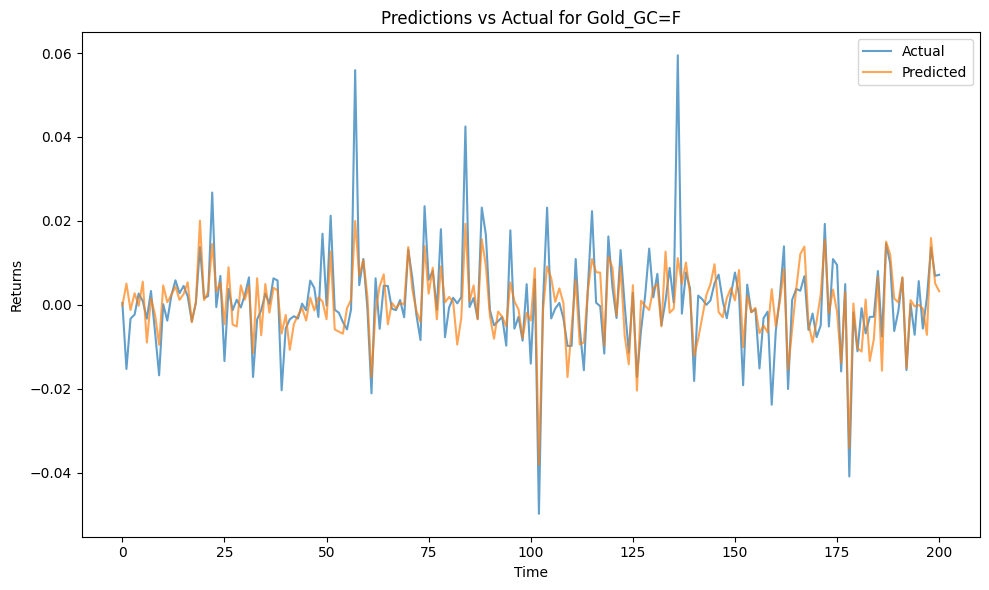

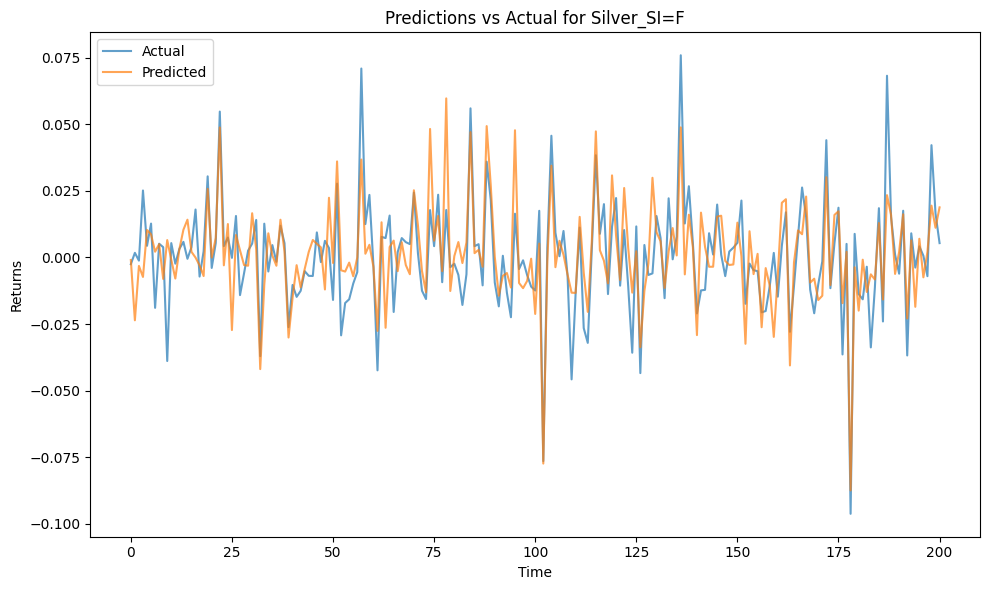

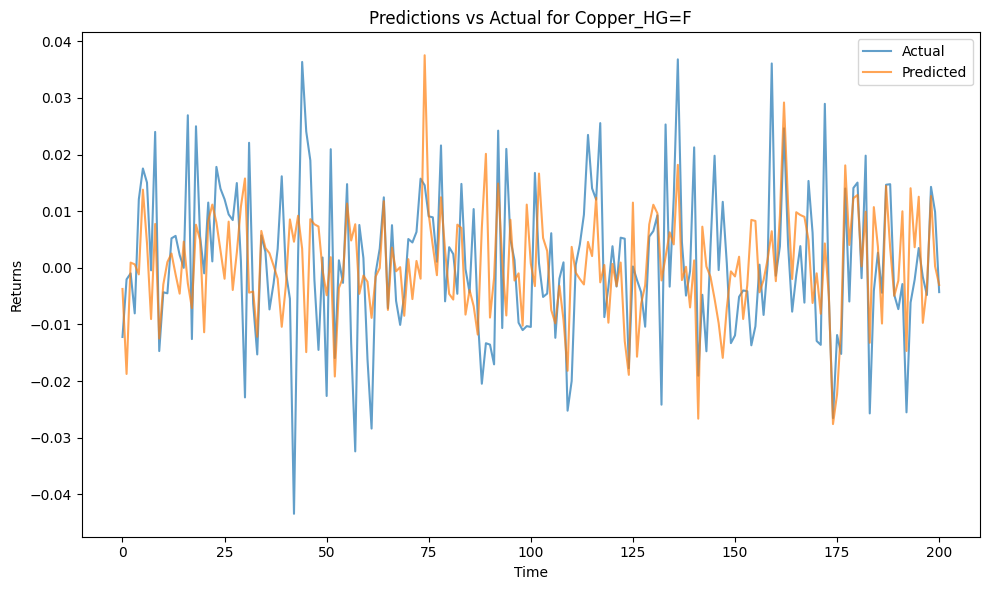

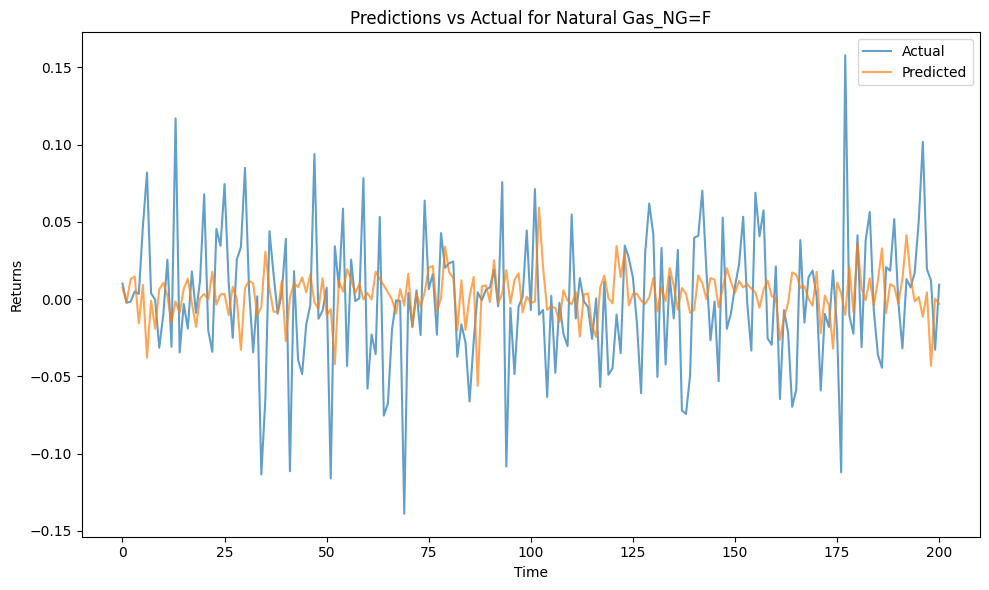

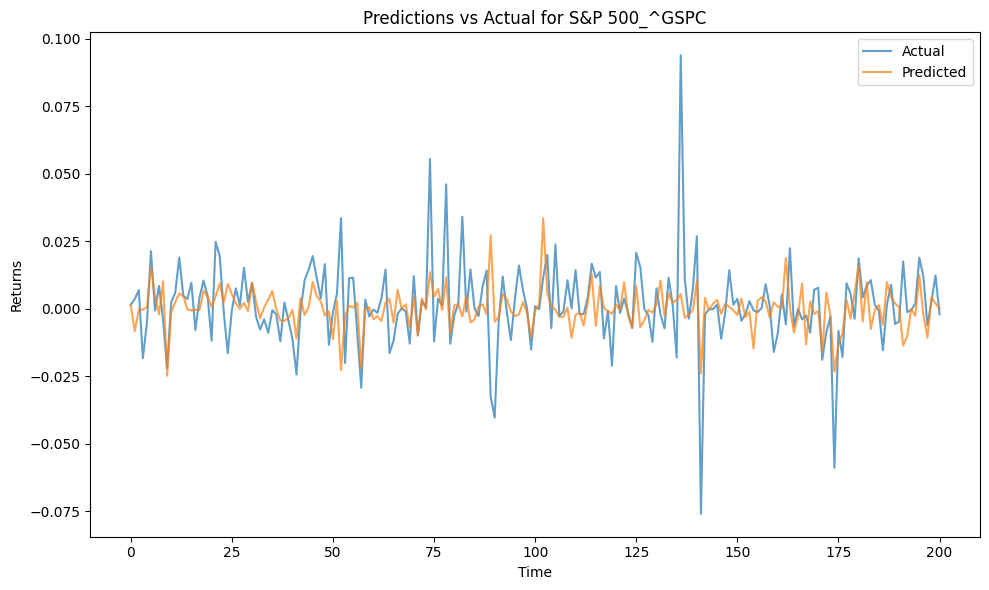

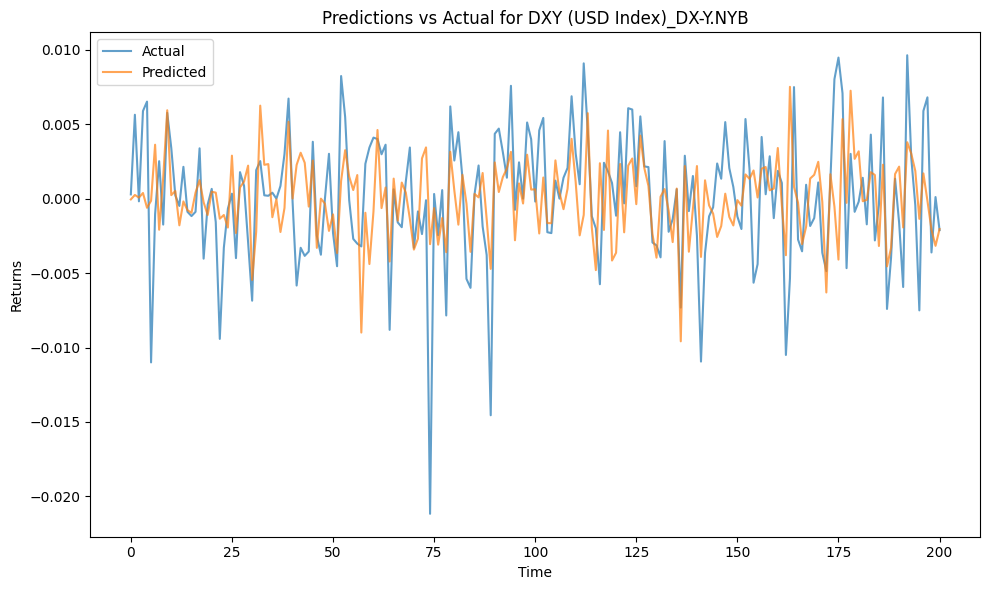

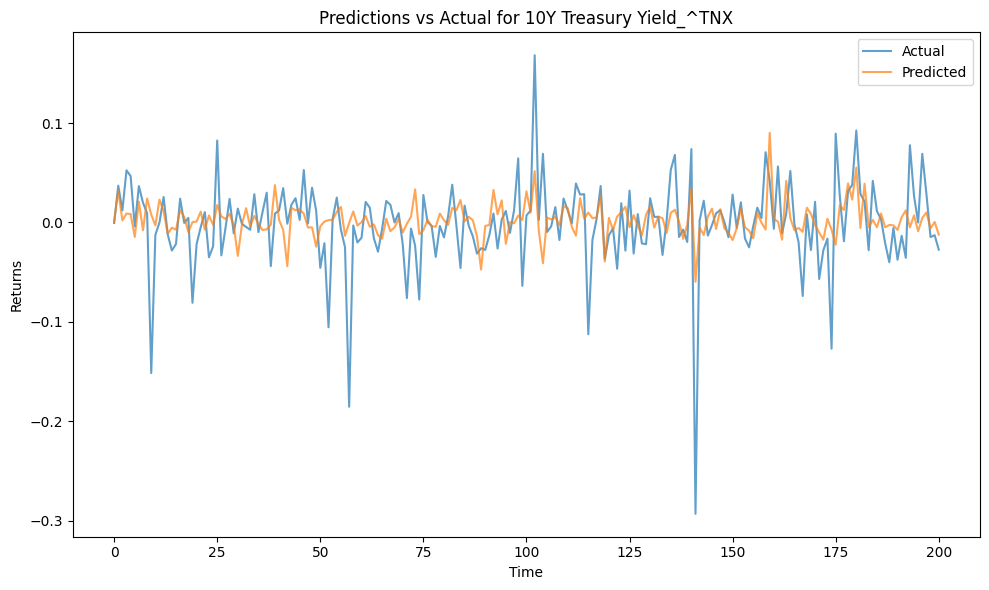

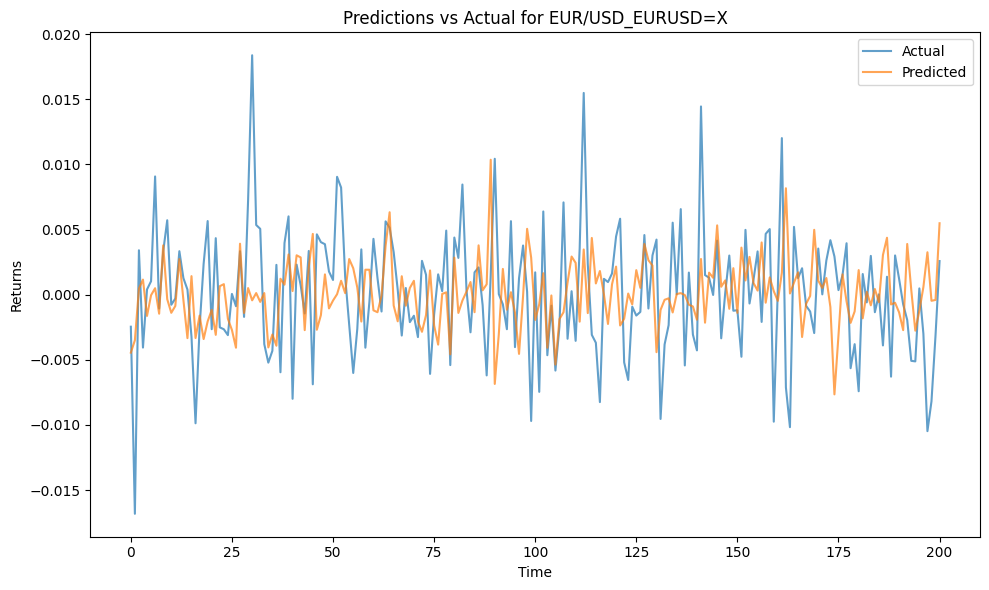

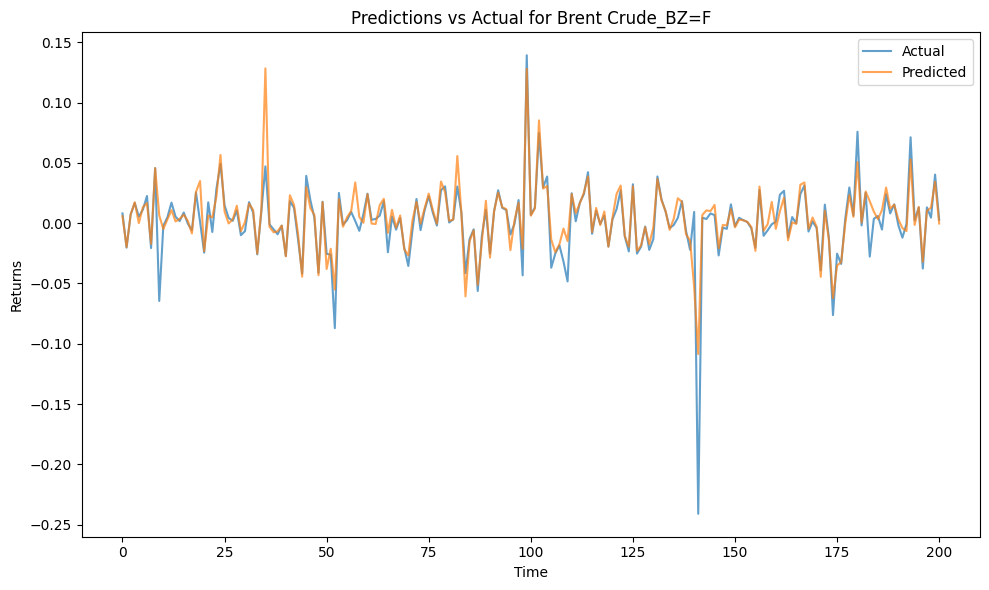

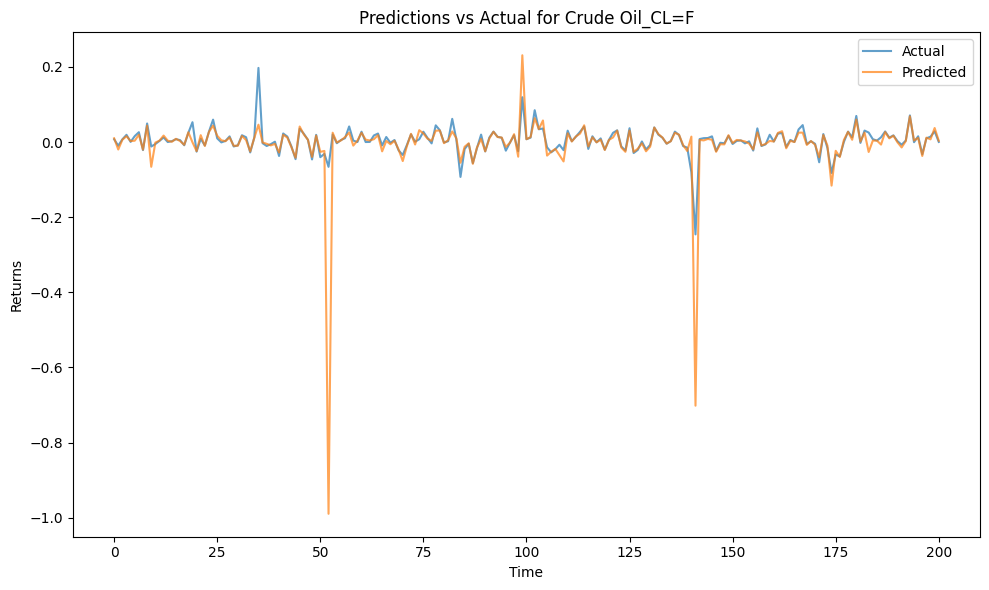


Performance Summary:
                               MSE  Accuracy
DXY (USD Index)_DX-Y.NYB  0.000016  0.651741
EUR/USD_EURUSD=X          0.000029  0.477612
Gold_GC=F                 0.000058  0.731343
Copper_HG=F               0.000176  0.611940
Silver_SI=F               0.000191  0.751244
S&P 500_^GSPC             0.000211  0.562189
Brent Crude_BZ=F          0.000242  0.895522
10Y Treasury Yield_^TNX   0.001739  0.597015
Natural Gas_NG=F          0.002199  0.497512
Crude Oil_CL=F            0.005612  0.905473


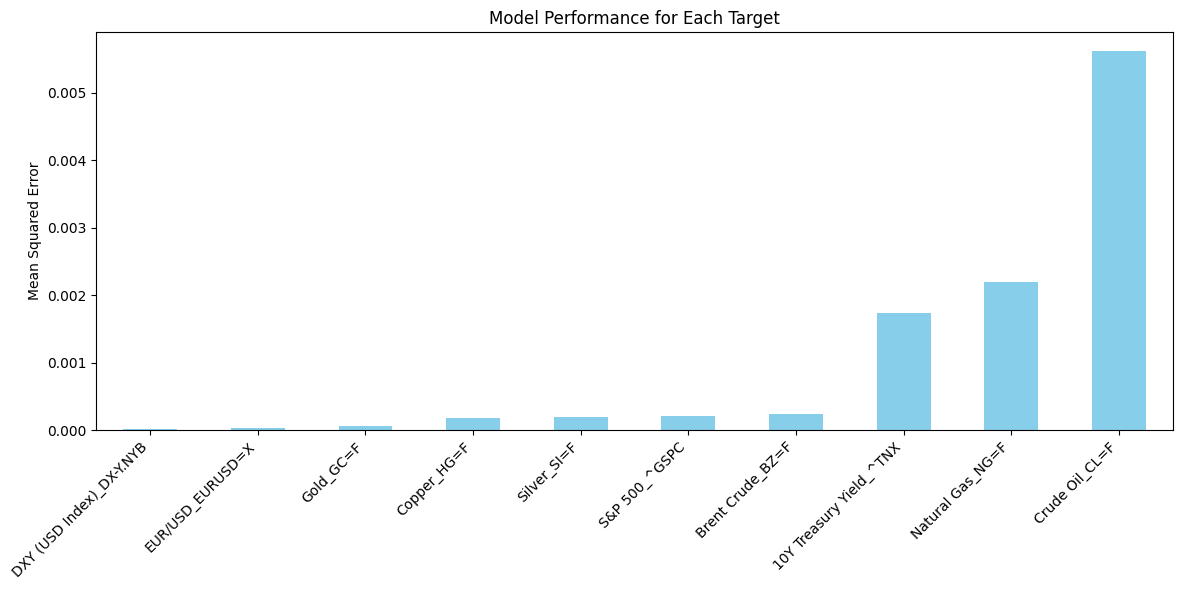

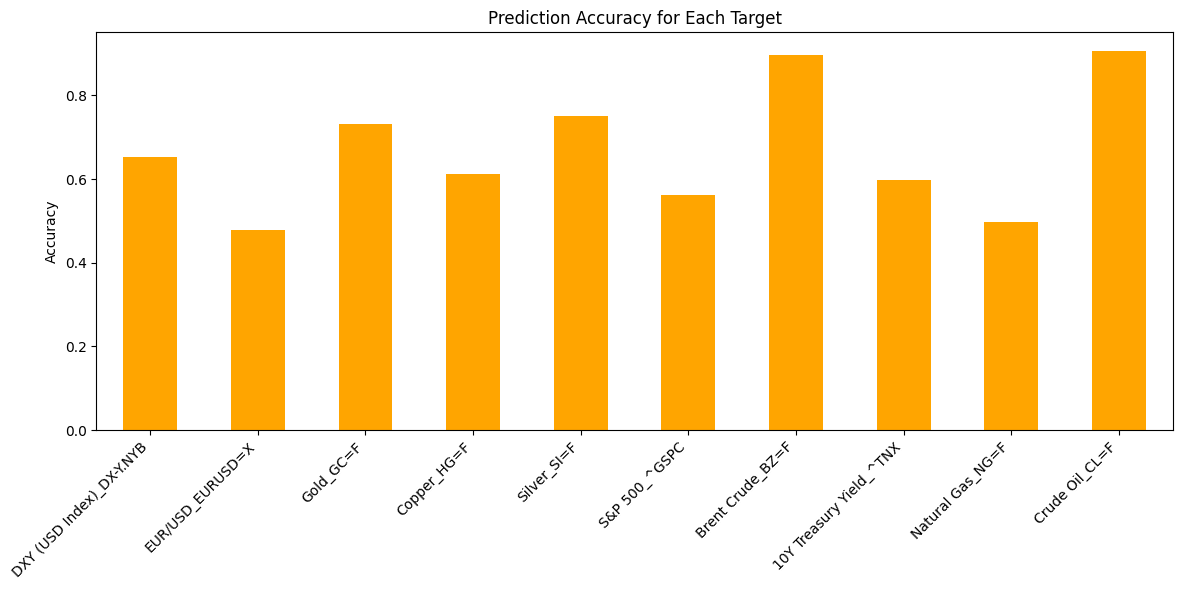

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to prepare data and make predictions
def forecast_with_influencers(data, influences, target_col):
    results = {}

    # Extract series that influence the target
    predictors = influences.get(target_col, [])
    if not predictors:
        print(f"No influencers found for {target_col}. Skipping.")
        return None

    # Create dataset with target and predictors
    predictors_data = data[predictors]
    target_data = data[target_col]

    # Calculate daily returns
    target_returns = target_data.pct_change().dropna()
    predictors_returns = predictors_data.pct_change().dropna()

    # Align data
    predictors_returns = predictors_returns.loc[target_returns.index]

    # Create binary target: return greater or less than zero
    target_binary = (target_returns > 0).astype(int)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        predictors_returns, target_returns, test_size=0.2, random_state=42
    )
    y_binary_train, y_binary_test = train_test_split(target_binary, test_size=0.2, random_state=42)

    # Train a model to predict returns
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predict returns and their signs
    y_pred = model.predict(X_test)
    y_binary_pred = (y_pred > 0).astype(int)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    accuracy = accuracy_score(y_binary_test, y_binary_pred)

    # Save results
    results['mse'] = mse
    results['accuracy'] = accuracy
    results['y_test'] = y_test
    results['y_pred'] = y_pred

    return results

# Loop through each series and its influences
performance_summary = {}
plots = []

for target_col in influence_summary.index:
    influencers = influence_summary.loc[target_col, 'Influenced By']
    result = forecast_with_influencers(combined_data, influence_summary['Influenced By'], target_col)

    if result:
        # Save results in the summary
        performance_summary[target_col] = {
            'MSE': result['mse'],
            'Accuracy': result['accuracy']
        }

        # Plot results
        plt.figure(figsize=(10, 6))
        plt.plot(result['y_test'].values, label="Actual", alpha=0.7)
        plt.plot(result['y_pred'], label="Predicted", alpha=0.7)
        plt.title(f"Predictions vs Actual for {target_col}")
        plt.xlabel("Time")
        plt.ylabel("Returns")
        plt.legend()
        plt.tight_layout()
        plt.show()

# Performance summary
performance_df = pd.DataFrame(performance_summary).T
performance_df.sort_values(by="MSE", ascending=True, inplace=True)

print("\nPerformance Summary:")
print(performance_df)

# Visualization of performance
plt.figure(figsize=(12, 6))
performance_df['MSE'].plot(kind='bar', color='skyblue', label='MSE')
plt.ylabel("Mean Squared Error")
plt.title("Model Performance for Each Target")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
performance_df['Accuracy'].plot(kind='bar', color='orange', label='Accuracy')
plt.ylabel("Accuracy")
plt.title("Prediction Accuracy for Each Target")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 5 - Enhanced Visualization of Predictions with Trend Indication

This section expands on the predictive modeling process by adding a detailed visualization of predictions, emphasizing the correctness of forecasted trends. Key steps include:

1. **Iterative Analysis for Each Target Series**:
   - Loops through each target series and its associated influencers, performing forecasting and evaluating the results.

2. **Trend-Based Visualization**:
   - Plots the actual vs. predicted returns for each target series.
   - Highlights the correctness of predicted trends using color-coded scatter points:
     - **Green**: Correctly predicted trend.
     - **Red**: Incorrectly predicted trend.

3. **Detailed Visual Components**:
   - Includes a dashed vertical line to indicate the split between training and testing data.
   - Adds clear labels for axes, legends, and titles to improve interpretability.

4. **Trend Validation**:
   - Compares the actual and predicted trends by evaluating the sign of the differences between consecutive points.
   - Uses this comparison to provide immediate visual feedback on the model’s performance in capturing trends.


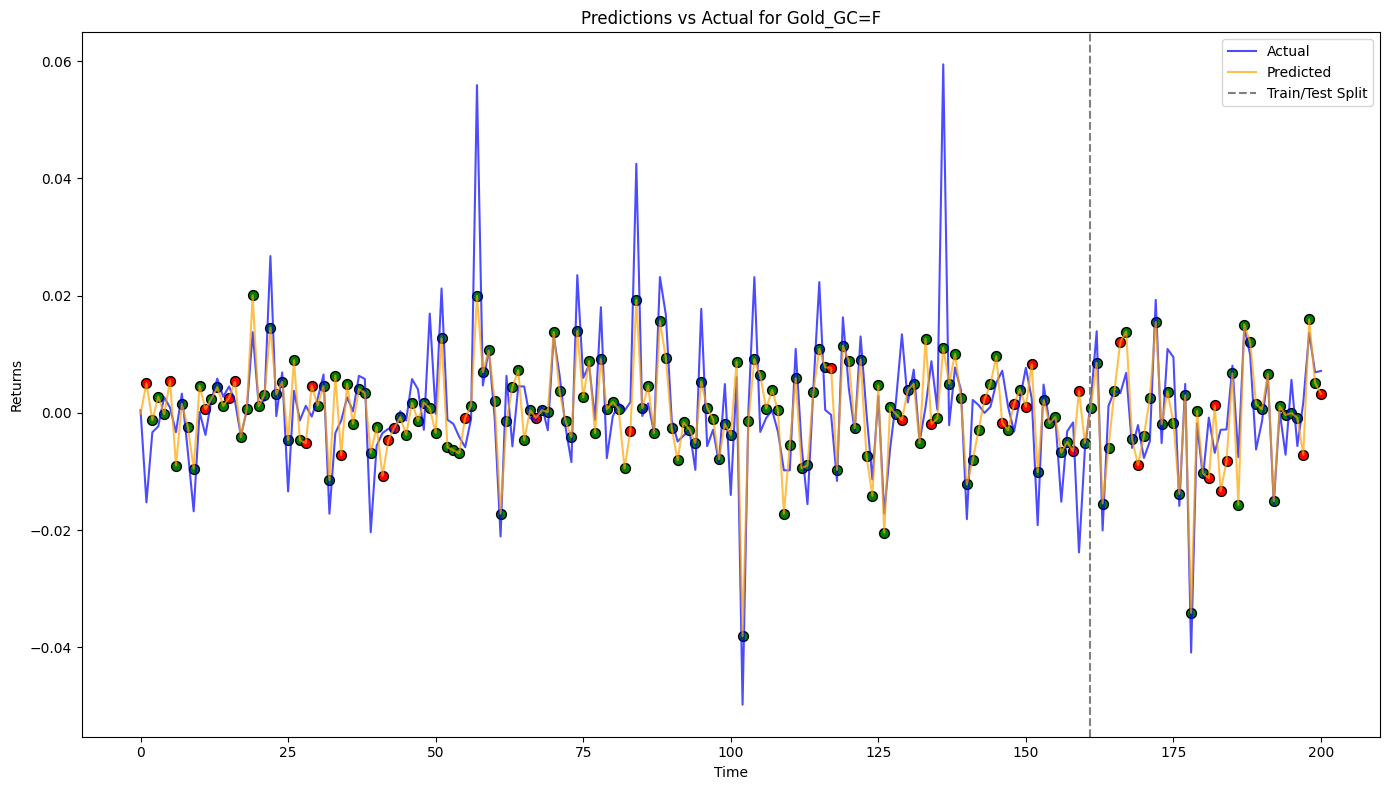

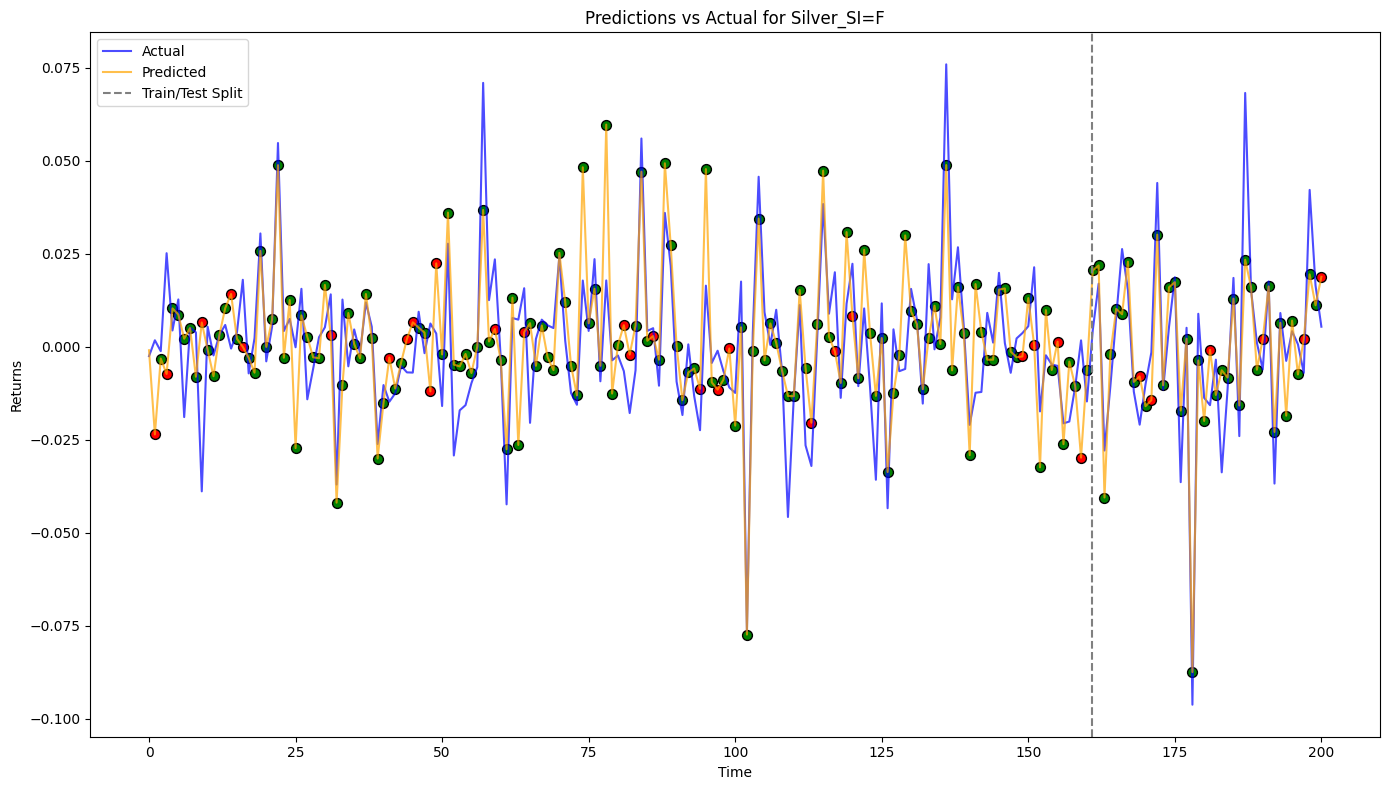

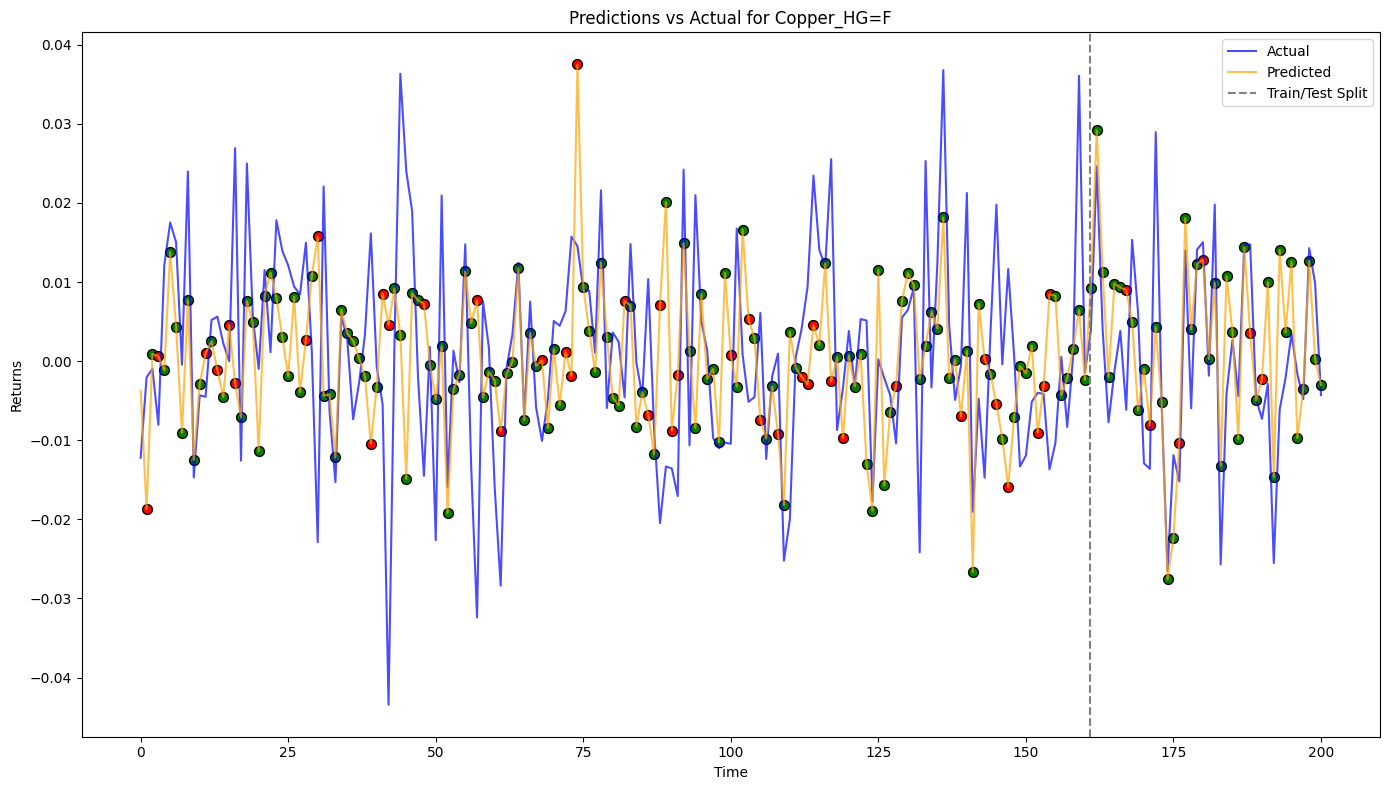

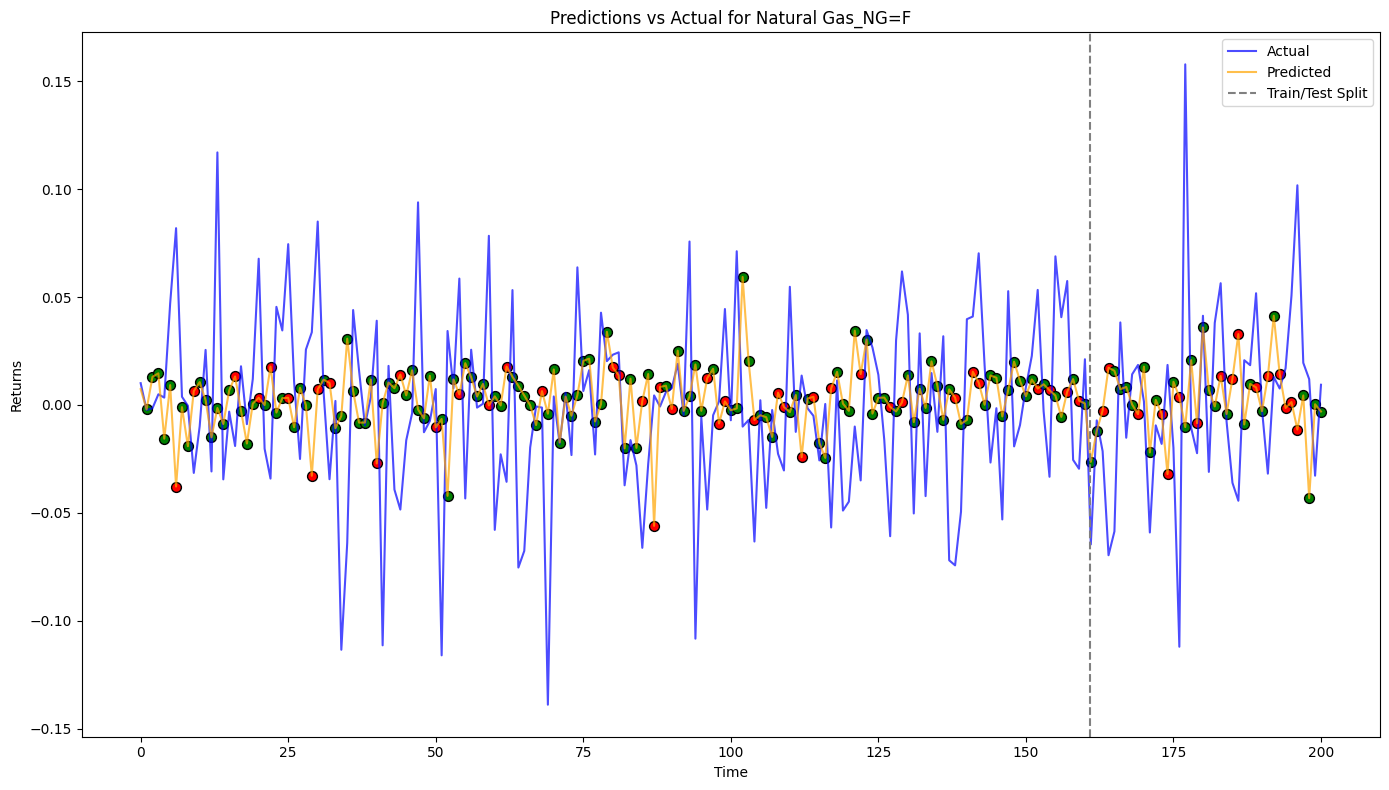

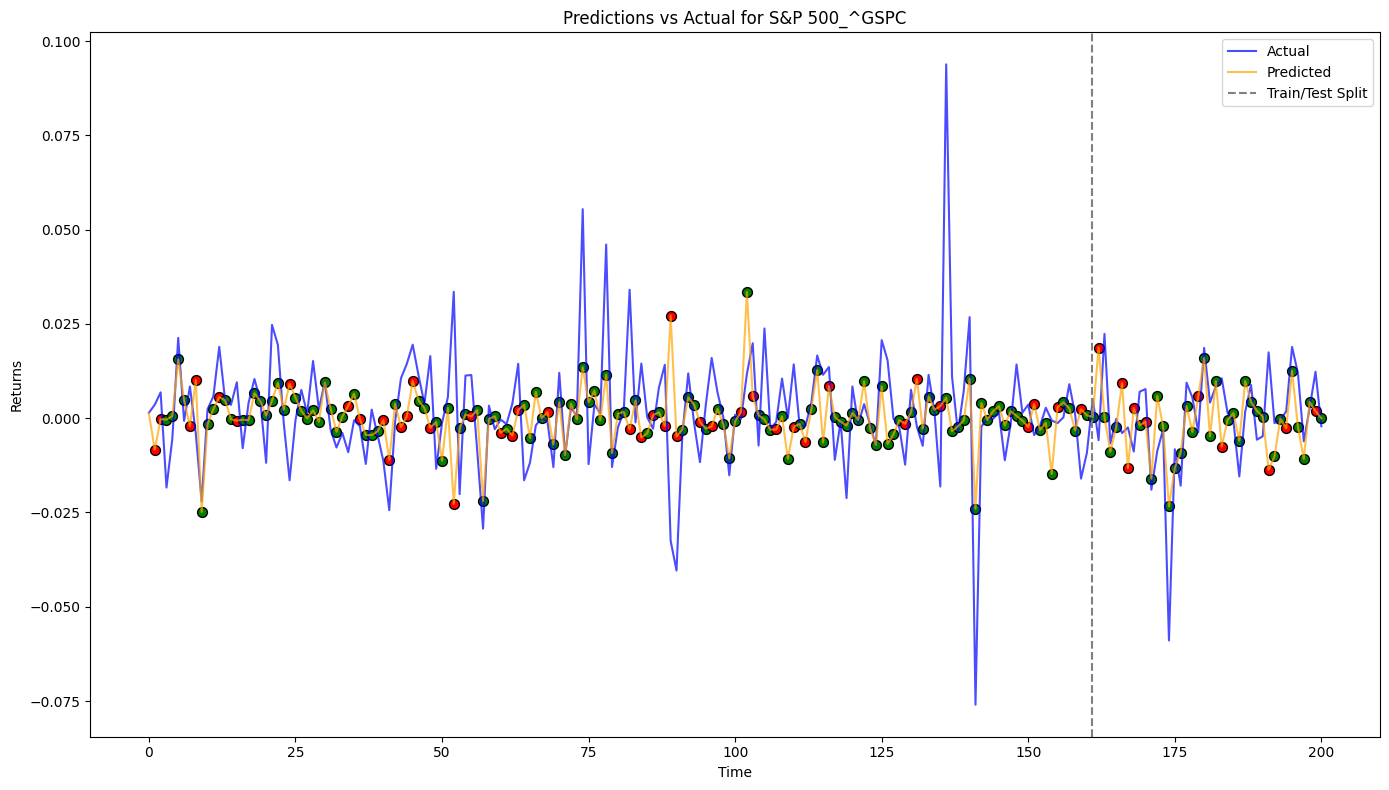

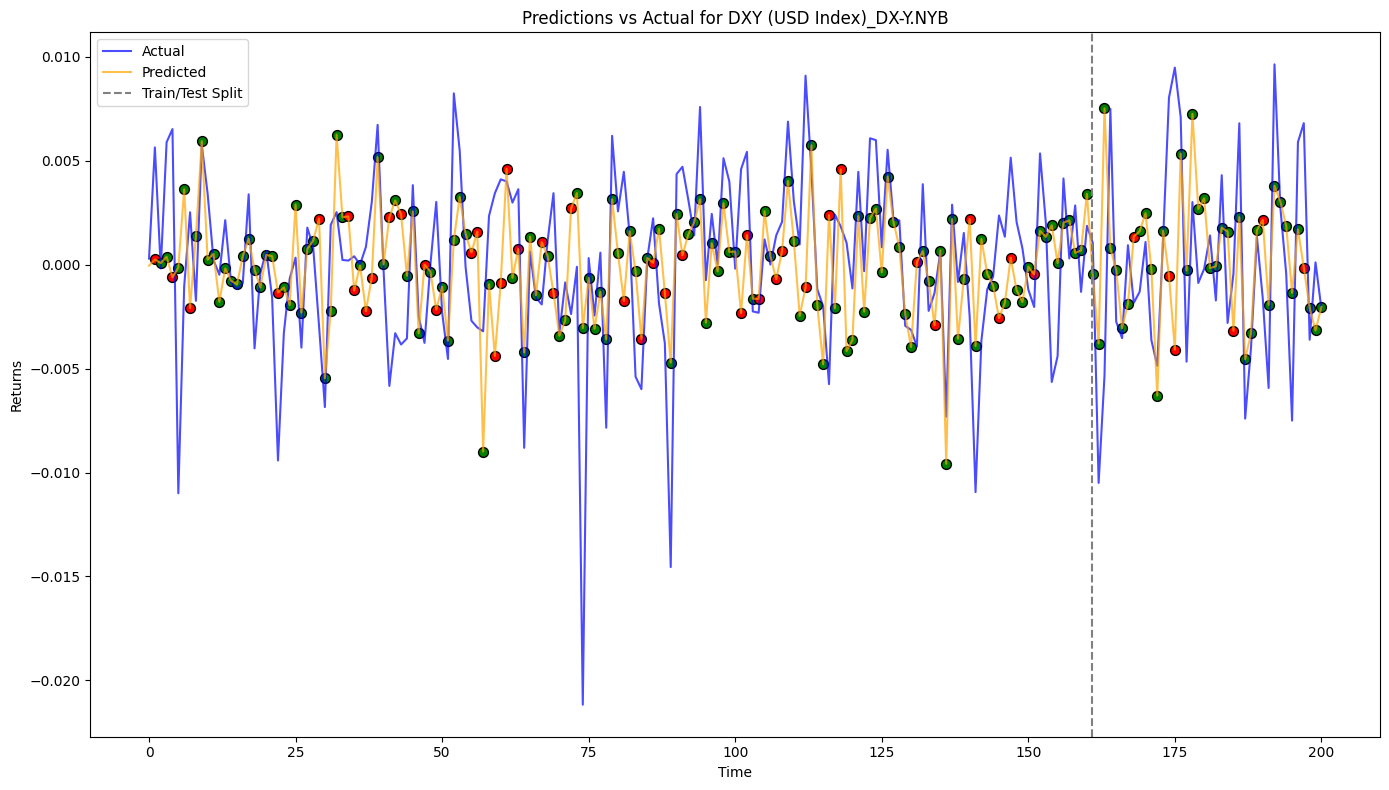

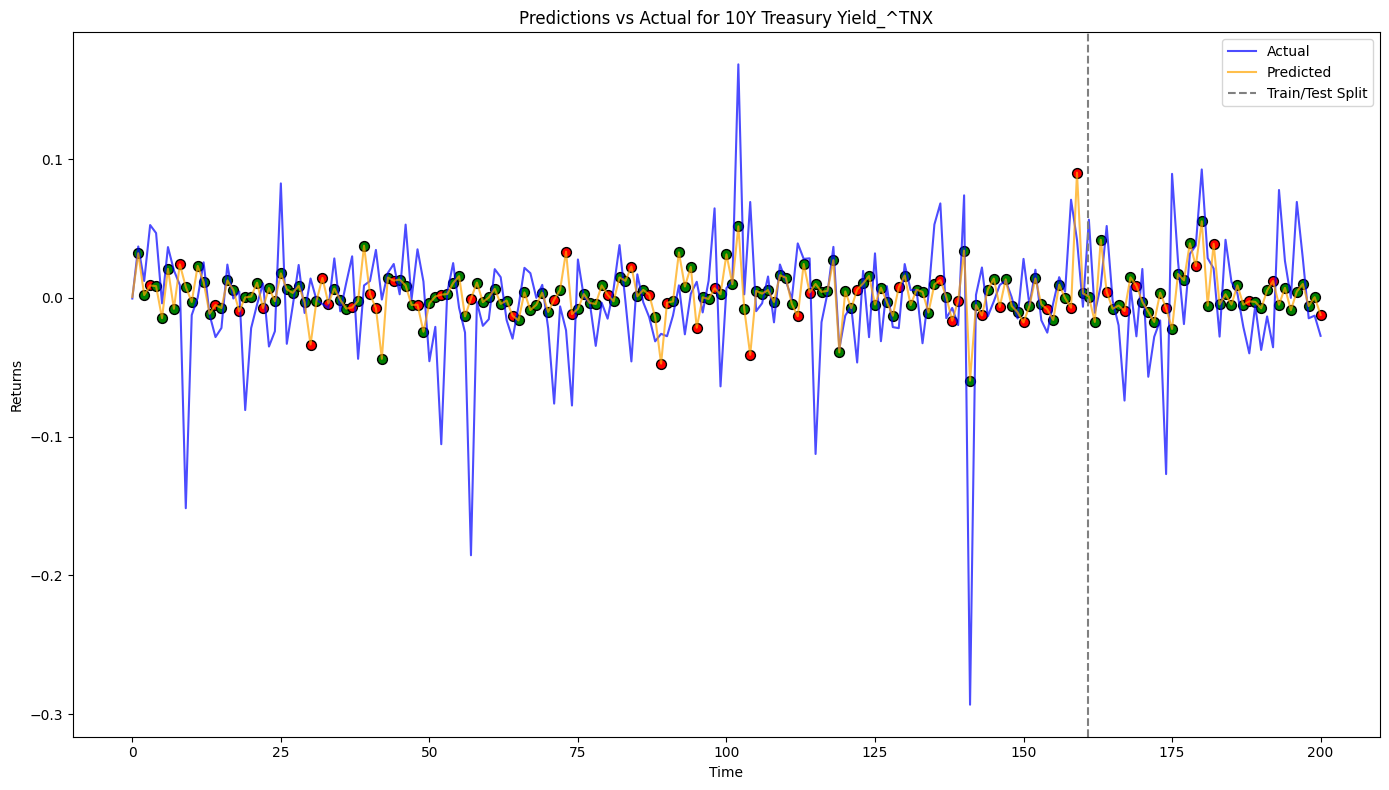

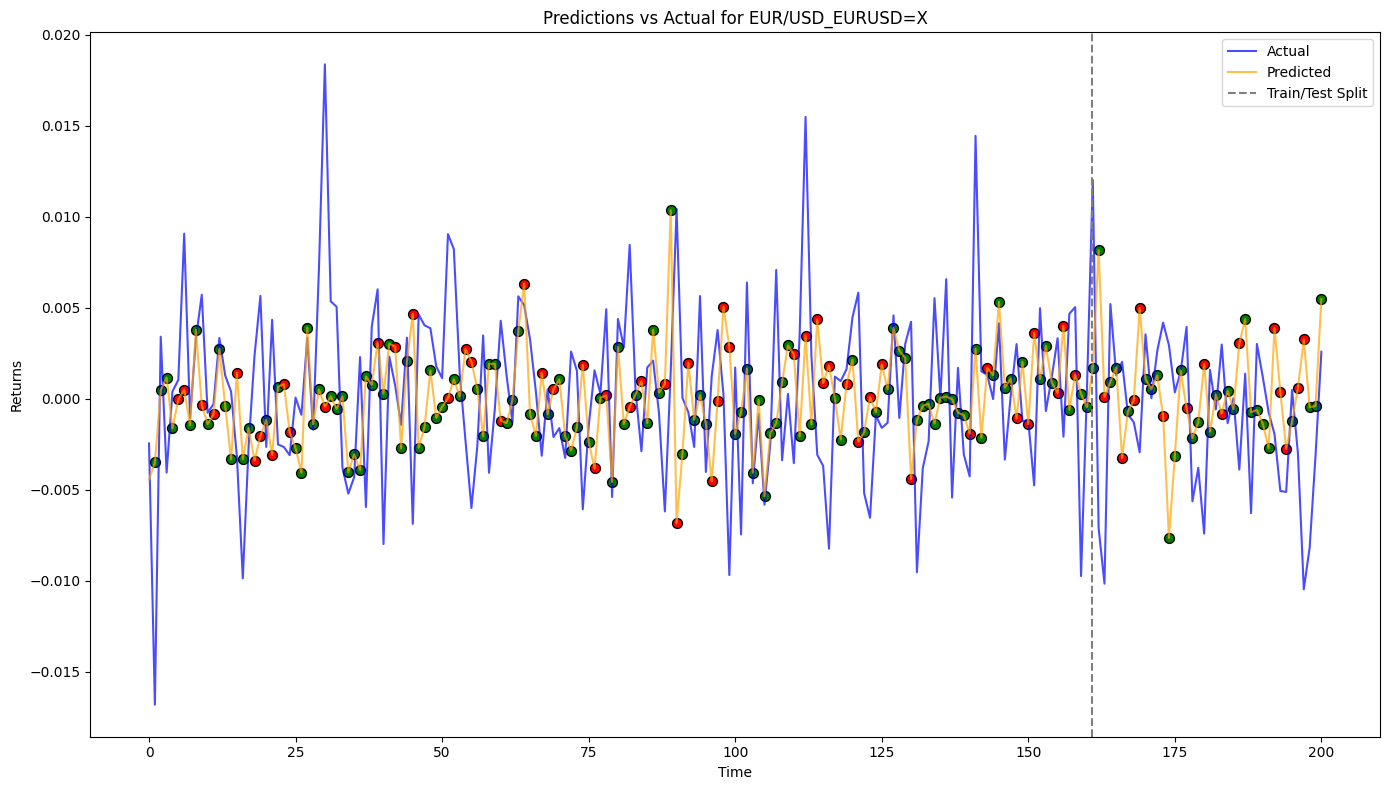

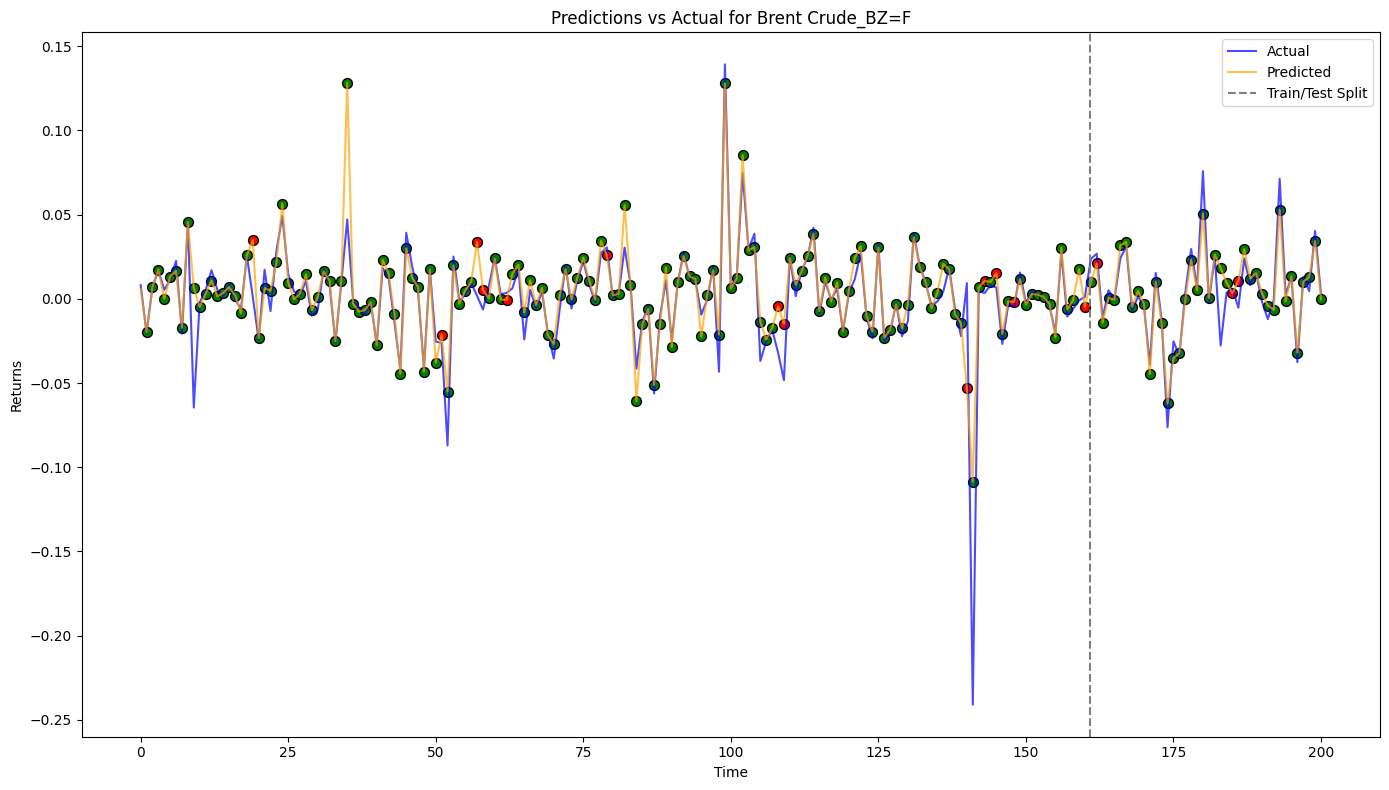

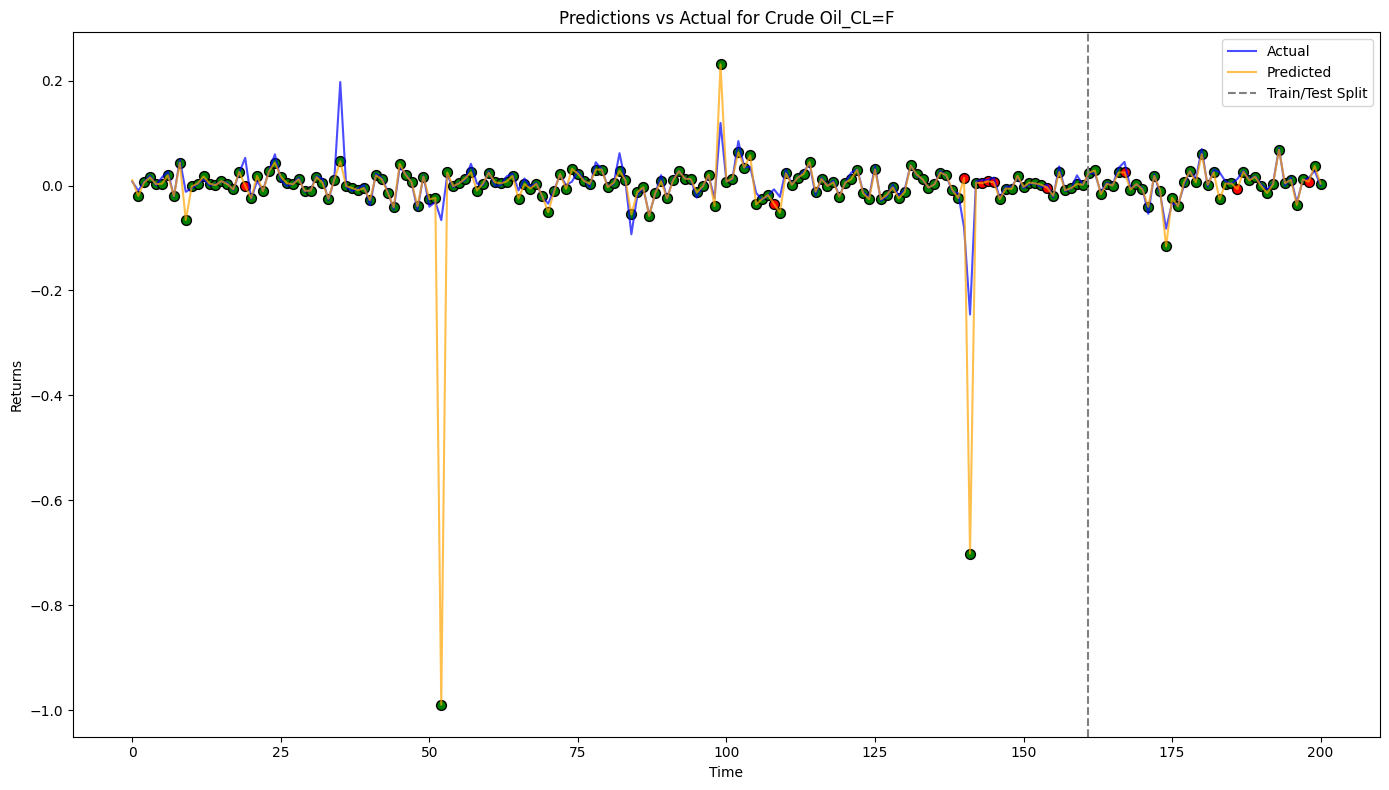

In [8]:
for target_col in influence_summary.index:
    influencers = influence_summary.loc[target_col, 'Influenced By']
    result = forecast_with_influencers(combined_data, influence_summary['Influenced By'], target_col)

    if result:
        # Save results in the summary
        performance_summary[target_col] = {
            'MSE': result['mse'],
            'Accuracy': result['accuracy']
        }

        # Plot results with correct/incorrect trend indication
        plt.figure(figsize=(14, 8))
        plt.plot(result['y_test'].values, label="Actual", alpha=0.7, color='blue')
        plt.plot(result['y_pred'], label="Predicted", alpha=0.7, color='orange')

        # Add green/red points for correct/incorrect trends
        for i in range(1, len(result['y_test'].values)):
            actual_trend = np.sign(result['y_test'].values[i] - result['y_test'].values[i-1])
            predicted_trend = np.sign(result['y_pred'][i] - result['y_test'].values[i-1])
            color = 'green' if actual_trend == predicted_trend else 'red'
            plt.scatter(i, result['y_pred'][i], color=color, s=50, edgecolor='black')

        plt.axvline(len(result['y_test']) * 0.8, color='gray', linestyle='--', label='Train/Test Split')
        plt.title(f"Predictions vs Actual for {target_col}")
        plt.xlabel("Time")
        plt.ylabel("Returns")
        plt.legend()
        plt.tight_layout()
        plt.show()


### 6-  Conclusions from the Performance Summary


#### 1. **Top Performers by Accuracy**:
   - **Crude Oil (CL=F)** and **Brent Crude (BZ=F)** are the most accurately predicted series, with accuracy scores of 90.5% and 89.6%, respectively.
     - This suggests strong relationships with their influencers, making them highly predictable.
   - **Silver (SI=F)** and **Gold (GC=F)** also demonstrate high accuracy, with 75.1% and 73.1%, respectively, indicating reliable predictability for precious metals.

#### 2. **Lowest Accuracy**:
   - **EUR/USD (EURUSD=X)** shows the lowest accuracy (47.8%), suggesting weak or less predictable relationships with its influencers.
   - **Natural Gas (NG=F)** also has a low accuracy (49.8%), indicating challenges in capturing its dynamics, likely due to unique market factors or higher volatility.

#### 3. **Top Performers by MSE**:
   - **DXY (USD Index)** has the lowest MSE (0.000016), suggesting excellent model performance in predicting actual return values with minimal error.
   - **EUR/USD (EURUSD=X)** and **Gold (GC=F)** also show low MSE values (0.000029 and 0.000058), indicating precise return predictions for these series.

#### 4. **Series with Higher MSE**:
   - **Crude Oil (CL=F)** and **Natural Gas (NG=F)** have the highest MSE values (0.005612 and 0.002199), reflecting larger prediction errors. Despite Crude Oil’s high accuracy, the higher MSE indicates challenges in predicting exact return values, likely due to larger fluctuations.

#### 5. **General Observations**:
   - Predictive performance varies significantly across assets, with energy commodities (e.g., Crude Oil, Natural Gas) showing higher MSE but strong directional accuracy, whereas indices (e.g., S&P 500) and metals exhibit moderate performance.
   - Forex pairs, such as EUR/USD and DXY, have low MSE but varying accuracy, highlighting the complexity of exchange rate dynamics.

#### 6. **Implications**:
   - Series like **Crude Oil** and **Brent Crude** can be effectively modeled for trend prediction, making them ideal candidates for forecasting strategies.
   - Series with low accuracy, such as **EUR/USD** and **Natural Gas**, may require further investigation, potentially involving additional predictors or alternative modeling approaches.
   - MSE and accuracy together provide a balanced perspective: assets with high accuracy but higher MSE (e.g., Crude Oil) may be more useful for directional predictions than precise return forecasts.


# PART II: FORECAST WITH STOCHASTIC PROCESSES

### Code Overview

This script is designed to forecast the price of Crude Oil using Monte Carlo simulations, with volatility forecasts derived from a GARCH(1,1) model. The code is divided into two main parts:

1. **Data Preprocessing and Volatility Forecasting**:
   - **Log Returns Calculation**: The script calculates the log returns of Crude Oil prices and removes any invalid values (such as NaN or infinite values).
   - **GARCH(1,1) Model**: It uses the `arch` package to define and fit a GARCH(1,1) model on the log returns of Crude Oil. This model is used to forecast future volatility, which is essential for generating future price predictions.

2. **Monte Carlo Simulation with Percentile Visualization**:
   - **Monte Carlo Simulation**: Based on the forecasted volatility from the GARCH model, the script performs Monte Carlo simulations to predict the future price of Crude Oil for the next 180 days. The median prediction and the 25th and 75th percentiles of the simulated paths are computed.
   - **Visualization**: The script visualizes the historical data up to mid-2023, alongside the predicted median and percentiles for the future. It also compares the predicted path with the actual Crude Oil data from mid-2023 to 2024.
   - **Model Evaluation**: The Mean Squared Error (MSE) between the predicted median and real data is calculated to evaluate the performance of the model.


### 1 - Data Processing and Volatility Forecasting

1. **Log Return Calculation**:
   - The code starts by calculating the **logarithmic returns** for Crude Oil prices from the 'Crude Oil_CL=F' column of the dataset. This is done using the formula:
     \[
     \text{Log Return} = \log(\text{Price}_t) - \log(\text{Price}_{t-1})
     \]
     The `.diff()` function is used to compute the difference in the log prices.

2. **Data Cleaning**:
   - After calculating the log returns, the code removes any rows that contain NaN or infinite values using `.replace([np.inf, -np.inf], np.nan)` followed by `.dropna()`. This ensures the dataset used for modeling contains only valid data.

3. **Model Definition**:
   - A **GARCH(1,1)** (Generalized Autoregressive Conditional Heteroskedasticity) model is defined using the `arch` package. This model is used to estimate and forecast the **volatility** of Crude Oil returns, capturing conditional heteroscedasticity in the time series data.

4. **Model Fitting**:
   - The model is then **fitted** to the log returns data using `model.fit(disp='off')`. The `disp='off'` argument suppresses the output of the fitting process for cleaner execution.

5. **Volatility Forecasting**:
   - The model is used to **forecast future volatility** for a given horizon (30 days in this case). The `.forecast()` method returns the forecasted variance, from which the standard deviation (volatility) is derived using `np.sqrt()`.

6. **Visualization**:
   - The forecasted volatility for the next 30 days is plotted. The x-axis represents the **future days**, and the y-axis represents the **volatility**. The plot provides a visual representation of the expected volatility over the forecast horizon.


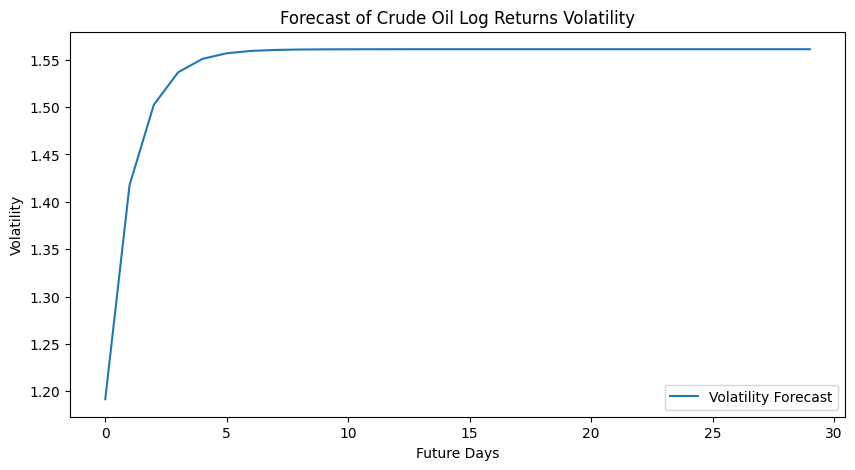

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# Assuming 'combined_data' is a DataFrame with a 'Date' column and a 'Crude Oil Price' column
# Calculate log returns
# Avoid zero values before calculating the logarithm
combined_data['Log_Returns'] = np.log(combined_data['Crude Oil_CL=F']).diff()

# Remove NaN or inf from 'Log_Returns'
combined_data = combined_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['Log_Returns'])

# Define the GARCH(1,1) model
model = arch_model(combined_data['Log_Returns'], vol='Garch', p=1, q=1)

# Fit the model to the data
model_fit = model.fit(disp='off')

# Forecast future volatility
forecast_horizon = 30
volatility_forecast = model_fit.forecast(horizon=forecast_horizon)

# Extract the predicted standard deviation (volatility)
predicted_volatility = np.sqrt(volatility_forecast.variance.values[-1, :])

# Visualize the predicted volatility
plt.figure(figsize=(10, 5))
plt.plot(predicted_volatility, label='Volatility Forecast')
plt.title('Forecast of Crude Oil Log Returns Volatility')
plt.xlabel('Future Days')
plt.ylabel('Volatility')
plt.legend()
plt.show()


The above image shows the **forecast of Crude Oil log returns volatility** for a 30-day horizon. The graph displays the predicted volatility values over the next 30 days based on the fitted GARCH(1,1) model.

- **X-axis**: Represents the forecasted future days (from the start date), showing the span of 30 days.
- **Y-axis**: Represents the **volatility** of Crude Oil log returns, which is derived from the forecasted variance values.
- **Graph Appearance**: The volatility curve initially rises sharply and then stabilizes, reflecting the model's tendency to predict more stable volatility values as the forecast horizon extends.

### 2 - Monte Carlo Simulation for Crude Oil Price Forecasting

This section performs Monte Carlo simulations to forecast Crude Oil prices using the GARCH volatility model. The goal is to simulate future price paths based on historical price behavior and forecasted volatility.

1. **Monte Carlo Simulation**:
   - The `monte_carlo_with_percentiles` function simulates future Crude Oil prices based on forecasted volatility derived from a GARCH(1,1) model. It runs multiple simulations (1000 by default) to generate a distribution of possible price paths over a 180-day forecast horizon.
   - The function takes the **historical data**, **forecasted volatility**, **target column** (Crude Oil prices), and **starting date** as inputs.
   - For each simulation, the future price is computed iteratively using the last observed price and a shock term derived from the forecasted volatility.

2. **Forecasted Volatility Extension**:
   - The forecasted volatility array is extended to match the forecast horizon. If the forecast horizon exceeds the length of the volatility array, the last value of the volatility is repeated to complete the forecast period.

3. **Price Path Simulation**:
   - The simulation generates **multiple price paths** using the formula:
     \[
     \text{next value} = \text{last value} + \text{drift} + \text{shock}
     \]
     where the shock is a random value scaled by the forecasted volatility. This simulates the randomness and uncertainty in future price movements.

4. **Statistical Calculation**:
   - After running all simulations, the **median prediction**, **25th percentile**, and **75th percentile** of the simulated paths are computed. These percentiles provide an understanding of the distribution of possible future prices.
   - The median path represents the most likely future price, while the 25th and 75th percentiles capture the range within which most future prices are expected to fall.

5. **Visualization**:
   - The **historical data** up to the forecast start date is plotted to provide context.
   - The **median predicted path** is plotted from the forecast start date onward, along with the **25th-75th percentile range** represented by a shaded area.
   - The **real data** (from mid-2023 to early 2024) is also overlaid on the plot for comparison.
   - Finally, the **Mean Squared Error (MSE)** between the predicted median and the actual data is calculated to assess the accuracy of the model.



Mean Squared Error (MSE) between predicted median and real data: 0.9906


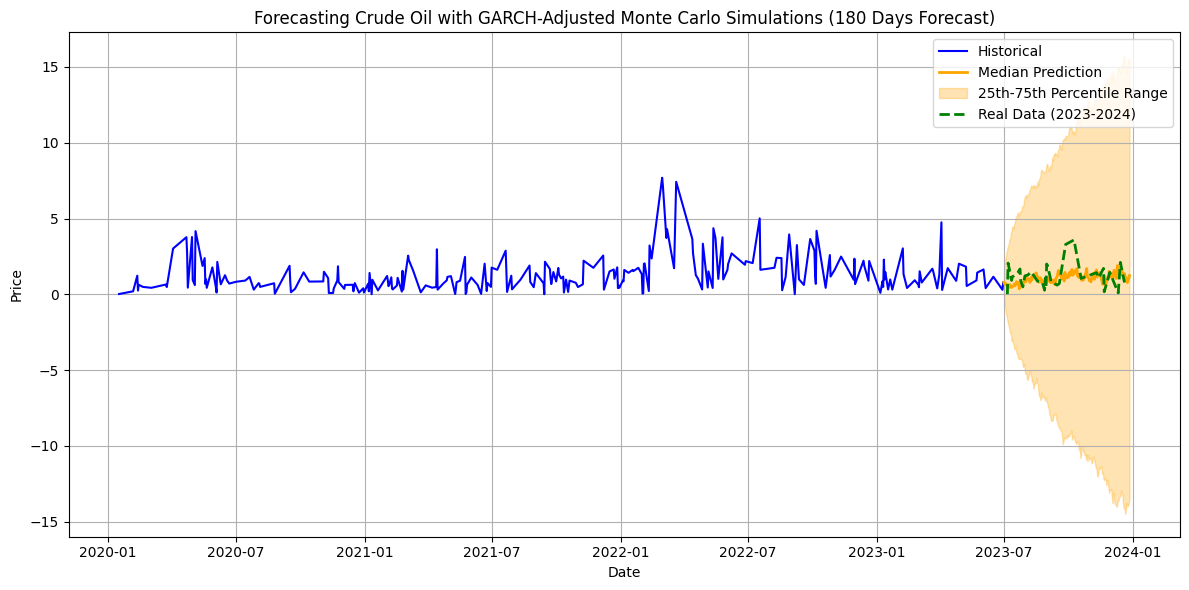

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Monte Carlo simulation with GARCH volatility and percentile visualization
def monte_carlo_with_percentiles(data, target_col, forecasted_volatility, start_date, forecast_horizon=180, n_simulations=1000):
    """
    Monte Carlo simulation for future values using GARCH volatility, with percentiles.

    Parameters:
    - data: DataFrame containing the time series.
    - target_col: Column name of the target series.
    - forecasted_volatility: Array of forecasted volatilities from the GARCH model.
    - start_date: Date from which to start the forecast.
    - forecast_horizon: Number of steps to predict.
    - n_simulations: Number of Monte Carlo simulations.

    Returns:
    - median_prediction: Median of simulated paths (expected future values).
    - lower_percentile: 25th percentile of simulated paths.
    - upper_percentile: 75th percentile of simulated paths.
    - simulated_paths: Array of all simulated paths.
    """
    last_value = data[data['Date'] == start_date][target_col].iloc[-1]

    # Extend the forecasted volatility if necessary
    extended_volatility = np.concatenate([forecasted_volatility, np.full(forecast_horizon - len(forecasted_volatility), forecasted_volatility[-1])])

    # Initialize array to store simulations
    simulated_paths = np.zeros((n_simulations, forecast_horizon))

    for sim in range(n_simulations):
        path = [last_value]
        for t in range(forecast_horizon):
            drift = 0  # No drift; adjust as needed
            shock = extended_volatility[t] * np.random.normal(0, 1)
            next_value = path[-1] + drift + shock
            path.append(next_value)
        simulated_paths[sim] = path[1:]  # Skip the initial last_value

    # Compute the statistics across simulations
    median_prediction = np.median(simulated_paths, axis=0)
    lower_percentile = np.percentile(simulated_paths, 25, axis=0)
    upper_percentile = np.percentile(simulated_paths, 75, axis=0)

    return median_prediction, lower_percentile, upper_percentile, simulated_paths

# Define your forecast horizon and number of simulations
forecast_horizon = 180  # 180 days forecast
n_simulations = 1000

# Define the start date for prediction (mid-2023)
start_date = pd.to_datetime('2023-06-30')  # Adjust as needed

# Perform Monte Carlo simulations using GARCH forecasted volatility
median_prediction, lower_percentile, upper_percentile, simulated_paths = monte_carlo_with_percentiles(
    combined_data,
    target_col="Crude Oil_CL=F",  # Replace with your target column
    forecasted_volatility=predicted_volatility,
    start_date=start_date,
    forecast_horizon=forecast_horizon,
    n_simulations=n_simulations,
)

# Generate prediction dates
prediction_dates = pd.date_range(
    start=start_date + pd.Timedelta(days=1), periods=forecast_horizon
)

# Visualization of Monte Carlo simulations with GARCH volatility and percentiles
plt.figure(figsize=(12, 6))

# Plot historical data up to the start date (mid-2023)
historical_data = combined_data[combined_data['Date'] <= start_date]
plt.plot(historical_data['Date'], historical_data['Crude Oil_CL=F'], label="Historical", color="blue")

# Plot median prediction after the start date (from mid-2023 onward)
plt.plot(
    prediction_dates,
    median_prediction,
    label="Median Prediction",
    color="orange",
    linewidth=2,
)

# Plot shaded area for 25th to 75th percentiles
plt.fill_between(
    prediction_dates,
    lower_percentile,
    upper_percentile,
    color="orange",
    alpha=0.3,
    label="25th-75th Percentile Range",
)

# Plot the real data from mid-2023 onwards to compare with predictions
real_data_after_start = combined_data[(combined_data['Date'] > start_date) & (combined_data['Date'] <= pd.to_datetime('2024-01-01'))]
plt.plot(
    real_data_after_start['Date'],
    real_data_after_start['Crude Oil_CL=F'],
    label="Real Data (2023-2024)",
    color="green",
    linewidth=2,
    linestyle="--"
)

# Calculate MSE between the predicted median and real data (only for the prediction period)
real_values = real_data_after_start['Crude Oil_CL=F'].values
mse = mean_squared_error(real_values, median_prediction[:len(real_values)])
print(f'Mean Squared Error (MSE) between predicted median and real data: {mse:.4f}')

# Add titles and labels
plt.title("Forecasting Crude Oil with GARCH-Adjusted Monte Carlo Simulations (180 Days Forecast)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### **3 - Conclusions from the Performance Summary**

1. **Mean Squared Error (MSE)**:
   - The MSE of 0.9906 suggests a relatively good fit between predicted and actual data, with some deviation, especially during periods of high volatility.

2. **Prediction Accuracy**:
   - The **Median Prediction** (orange line) follows the general trend of Crude Oil prices, but struggles with significant market fluctuations, as seen in 2023.
   - The **25th-75th Percentile Range** (shaded area) reflects the uncertainty in forecasts, with larger variations during volatile periods.

3. **Real Data Comparison**:
   - The **Real Data (2023-2024)** (green dashed line) deviates from predictions in certain periods, highlighting the model's difficulty in capturing large price movements, despite the overall accuracy.

4. **Implications**:
   - While the model is useful for trend forecasting, larger market shifts and extreme events remain challenging to predict, especially for assets with high volatility like Crude Oil.
   - For better prediction accuracy, alternative models or additional data sources may be needed to account for abrupt market changes.